Import Dataset and Library

In [3]:
import pandas as pd

# Load the dataset using openpyxl
data = pd.read_excel('Dengue_final_as_MPOX.xlsx', engine='openpyxl')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


Lag Feature & Separated Day Month Year Index

In [4]:
# Adding lag features for New_Cases and New_Deaths
data['lag_1_cases'] = data['New_Cases'].shift(1)
data['lag_1_deaths'] = data['New_Deaths'].shift(1)

# Dropping any rows with NaN values created by lag
data.dropna(inplace=True)

# Adding additional time-based features
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day
data['DayOfWeek'] = data.index.dayofweek
data['WeekOfYear'] = data.index.isocalendar().week.astype(int)

# Display the preprocessed dataset and the newly added features
data.head()

,Total_Cases,Total_Deaths,New_Cases,New_Deaths,lag_1_cases,lag_1_deaths,Year,Month,Day,DayOfWeek,WeekOfYear
Date,,,,,,,,,,,
2019-08-26,7191,1,1251,1,1299.0,0.0,2019,8,26,0,35
2019-08-27,8490,1,1299,0,1251.0,1.0,2019,8,27,1,35
2019-08-28,9647,1,1157,0,1299.0,0.0,2019,8,28,2,35
2019-08-29,10836,4,1189,3,1157.0,0.0,2019,8,29,3,35
2019-08-30,11861,4,1025,0,1189.0,3.0,2019,8,30,4,35


Auto Correlation Graph Plotting

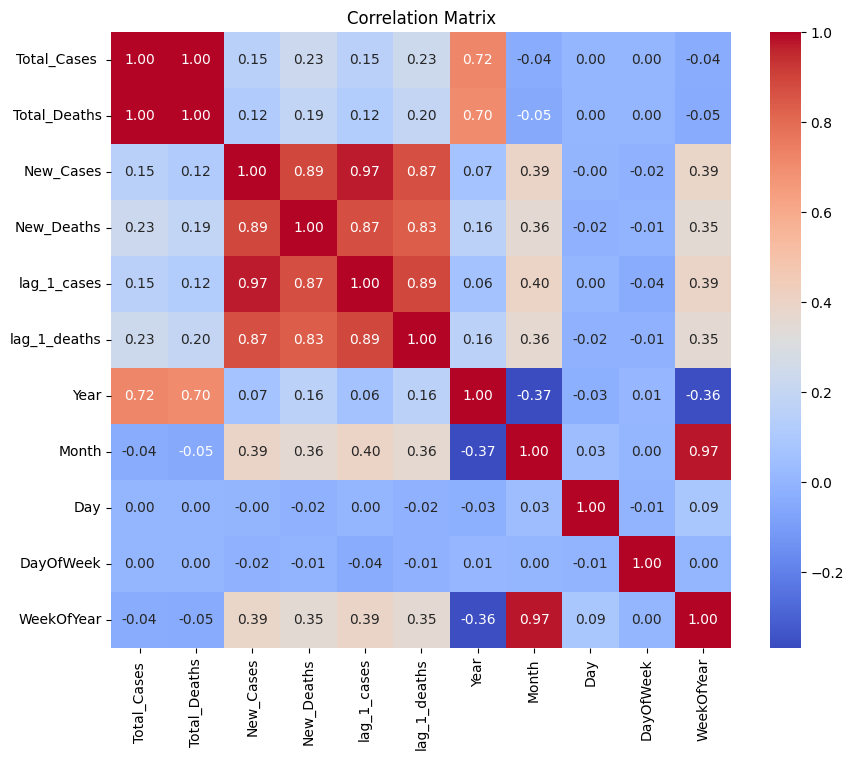

<Figure size 1000x400 with 0 Axes>

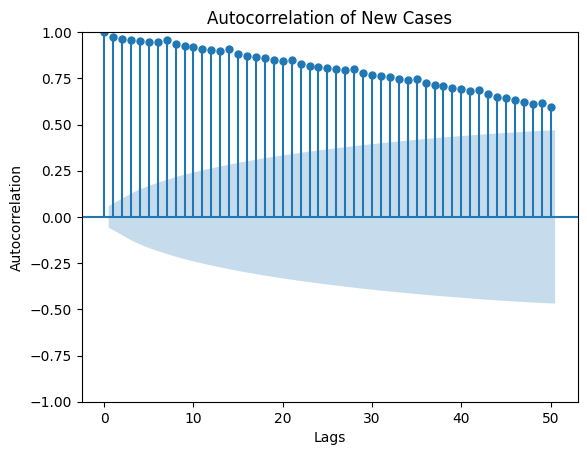

<Figure size 1000x400 with 0 Axes>

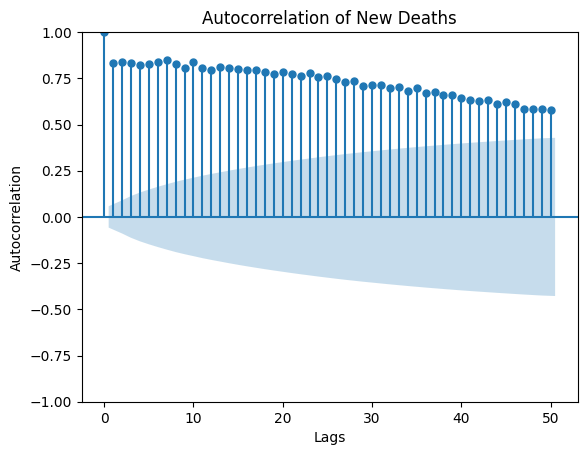

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

# Plotting correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Plotting the autocorrelation of New_Cases
plt.figure(figsize=(10, 4))
plot_acf(data['New_Cases'], lags=50)
plt.title('Autocorrelation of New Cases')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Plotting the autocorrelation of New_Deaths
plt.figure(figsize=(10, 4))
plot_acf(data['New_Deaths'], lags=50)
plt.title('Autocorrelation of New Deaths')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

Partial Auto-Correlation Graph Plotting

<Figure size 1000x400 with 0 Axes>

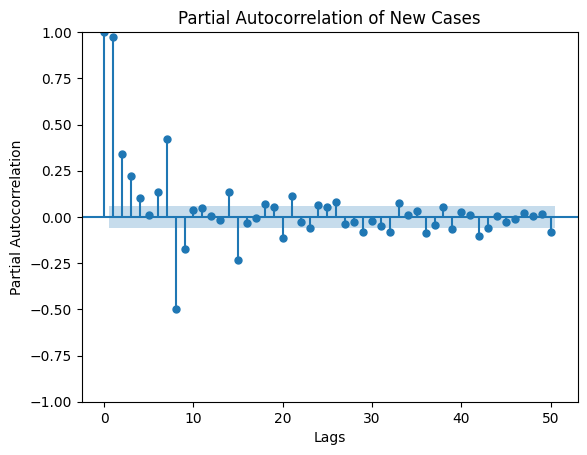

<Figure size 1000x400 with 0 Axes>

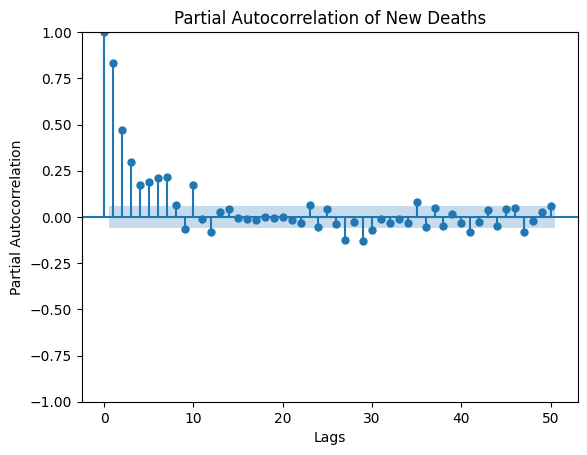

In [6]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plotting the partial autocorrelation of New_Cases
plt.figure(figsize=(10, 4))
plot_pacf(data['New_Cases'], lags=50, method='ywm')
plt.title('Partial Autocorrelation of New Cases')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

# Plotting the partial autocorrelation of New_Deaths
plt.figure(figsize=(10, 4))
plot_pacf(data['New_Deaths'], lags=50, method='ywm')
plt.title('Partial Autocorrelation of New Deaths')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()


Lagging and Rolling Feature Adding Lag(1,2,7) Rolling(mean_7,std_7)

In [7]:
# Generate lag features for New_Cases and New_Deaths
data['lag_1_cases'] = data['New_Cases'].shift(1)
data['lag_2_cases'] = data['New_Cases'].shift(2)
data['lag_7_cases'] = data['New_Cases'].shift(7)

data['lag_1_deaths'] = data['New_Deaths'].shift(1)
data['lag_2_deaths'] = data['New_Deaths'].shift(2)
data['lag_7_deaths'] = data['New_Deaths'].shift(7)

# Generate rolling statistics for New_Cases and New_Deaths
data['rolling_mean_7_cases'] = data['New_Cases'].rolling(window=7).mean()
data['rolling_std_7_cases'] = data['New_Cases'].rolling(window=7).std()

data['rolling_mean_7_deaths'] = data['New_Deaths'].rolling(window=7).mean()
data['rolling_std_7_deaths'] = data['New_Deaths'].rolling(window=7).std()

# Dropping any rows with NaN values created by lag/rolling features
data.dropna(inplace=True)

# Adding additional time-based features
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day
data['DayOfWeek'] = data.index.dayofweek
data['WeekOfYear'] = data.index.isocalendar().week.astype(int)

# Display the preprocessed dataset and the newly added features
data.head()

,Total_Cases,Total_Deaths,New_Cases,New_Deaths,lag_1_cases,lag_1_deaths,Year,Month,Day,DayOfWeek,WeekOfYear,lag_2_cases,lag_7_cases,lag_2_deaths,lag_7_deaths,rolling_mean_7_cases,rolling_std_7_cases,rolling_mean_7_deaths,rolling_std_7_deaths
Date,,,,,,,,,,,,,,,,,,,
2019-09-02,14388,7,865,1,902.0,2.0,2019,9,2,0,36,760.0,1251.0,0.0,1.0,1028.142857,195.908506,0.857143,1.214986
2019-09-03,15171,8,783,1,865.0,1.0,2019,9,3,1,36,902.0,1299.0,2.0,0.0,954.428571,172.711568,1.000000,1.154701
2019-09-04,15991,10,820,2,783.0,1.0,2019,9,4,2,36,865.0,1157.0,1.0,0.0,906.285714,152.636512,1.285714,1.112697
2019-09-05,16779,11,788,1,820.0,2.0,2019,9,5,3,36,783.0,1189.0,1.0,3.0,849.000000,92.086915,1.000000,0.816497
2019-09-06,17572,14,793,3,788.0,1.0,2019,9,6,4,36,820.0,1025.0,2.0,0.0,815.857143,50.581382,1.428571,0.975900


XGBOOST & RANDOM-FOREST WITH GRADIENT BOOSTING MODEL

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import numpy as np

# Function to evaluate the model's performance
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Splitting the dataset for New_Cases
X_cases = data.drop(['New_Cases', 'New_Deaths'], axis=1)
y_cases = data['New_Cases']
X_train_cases, X_test_cases, y_train_cases, y_test_cases = train_test_split(X_cases, y_cases, test_size=0.2, random_state=42)

# Splitting the dataset for New_Deaths
y_deaths = data['New_Deaths']
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(X_cases, y_deaths, test_size=0.2, random_state=42)

# Define models
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=1000, max_depth=5, learning_rate=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=1000, random_state=42)

# Train the models on New Cases
models = [xgb_model, rf_model, gb_model]
predictions_cases = []

for model in models:
    model.fit(X_train_cases, y_train_cases)
    preds = model.predict(X_test_cases)
    predictions_cases.append(preds)

# Averaging predictions for New Cases
final_predictions_cases = np.mean(predictions_cases, axis=0)

# Evaluate for New Cases
mse_cases, rmse_cases, mae_cases, r2_cases = evaluate_model(y_test_cases, final_predictions_cases)

# Train the models on New Deaths
predictions_deaths = []

for model in models:
    model.fit(X_train_deaths, y_train_deaths)
    preds = model.predict(X_test_deaths)
    predictions_deaths.append(preds)

# Averaging predictions for New Deaths
final_predictions_deaths = np.mean(predictions_deaths, axis=0)

# Evaluate for New Deaths
mse_deaths, rmse_deaths, mae_deaths, r2_deaths = evaluate_model(y_test_deaths, final_predictions_deaths)

# Print the evaluation metrics for New Cases
print(f"Evaluation Metrics for New Cases:")
print(f"RMSE: {rmse_cases}")
print(f"MSE: {mse_cases}")
print(f"MAE: {mae_cases}")
print(f"R-squared: {r2_cases}\n")

# Print the evaluation metrics for New Deaths
print(f"Evaluation Metrics for New Deaths:")
print(f"RMSE: {rmse_deaths}")
print(f"MSE: {mse_deaths}")
print(f"MAE: {mae_deaths}")
print(f"R-squared: {r2_deaths}")

Evaluation Metrics for New Cases:
RMSE: 149.95551275934946
MSE: 22486.65580691942
MAE: 59.05028584005928
R-squared: 0.95547710989093

Evaluation Metrics for New Deaths:
RMSE: 1.4831420757050395
MSE: 2.1997104167266532
MAE: 0.7722849203888638
R-squared: 0.8422350843142304


Future Data in DataFrame 

In [9]:
import pandas as pd

# Load the dataset
data = pd.read_excel('Dengue_final_as_MPOX.xlsx')

# Convert the 'Date' column to datetime format and handle any potential errors
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop any rows where the 'Date' conversion failed
data = data.dropna(subset=['Date'])

# Strip any extra spaces from column names
data.columns = data.columns.str.strip()

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Define the last known values for cases and deaths
last_known_cases = data.iloc[-1]['New_Cases']
last_known_deaths = data.iloc[-1]['New_Deaths']
last_total_cases = data.iloc[-1]['Total_Cases']
last_total_deaths = data.iloc[-1]['Total_Deaths']

# Generate a date range for the next 365 days starting from the day after the last date in the dataset
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=365, freq='D')

# Create a DataFrame for these dates with columns ordered as per the trained model
future_data = pd.DataFrame({
    'Total_Cases': last_total_cases,
    'Total_Deaths': last_total_deaths,
    'lag_1_cases': last_known_cases,
    'lag_2_cases': last_known_cases,  # Using last known as lag_2 since we don't have it for future dates
    'lag_7_cases': last_known_cases,  # Same logic for lag_7
    'lag_1_deaths': last_known_deaths,
    'lag_2_deaths': last_known_deaths,
    'lag_7_deaths': last_known_deaths,
    'Year': future_dates.year,
    'Month': future_dates.month,
    'Day': future_dates.day,
    'DayOfWeek': future_dates.dayofweek.astype(int),
    'WeekOfYear': future_dates.isocalendar().week.astype(int)
}, index=future_dates)

# Add rolling mean and std for future dates (can be assumed constant or similar to the last known values)
future_data['rolling_mean_7_cases'] = data['New_Cases'].rolling(7).mean().iloc[-1]
future_data['rolling_std_7_cases'] = data['New_Cases'].rolling(7).std().iloc[-1]

future_data['rolling_mean_7_deaths'] = data['New_Deaths'].rolling(7).mean().iloc[-1]
future_data['rolling_std_7_deaths'] = data['New_Deaths'].rolling(7).std().iloc[-1]

# Display the first few rows of future_data
print(future_data.head())

            Total_Cases  Total_Deaths  lag_1_cases  lag_2_cases  lag_7_cases  \
2024-09-01       423128          2116          346          346          346   
2024-09-02       423128          2116          346          346          346   
2024-09-03       423128          2116          346          346          346   
2024-09-04       423128          2116          346          346          346   
2024-09-05       423128          2116          346          346          346   

            lag_1_deaths  lag_2_deaths  lag_7_deaths  Year  Month  Day  \
2024-09-01             4             4             4  2024      9    1   
2024-09-02             4             4             4  2024      9    2   
2024-09-03             4             4             4  2024      9    3   
2024-09-04             4             4             4  2024      9    4   
2024-09-05             4             4             4  2024      9    5   

            DayOfWeek  WeekOfYear  rolling_mean_7_cases  rolling_std_7_cas

Predication Cases

In [10]:
# Load and display the predictions
predicted_cases = pd.read_excel('Dengue_final_as_MPOX.xlsx')

print(predicted_cases.head())

        Date  Total_Cases   Total_Deaths  New_Cases  New_Deaths
0 2019-08-25          5940             0       1299           0
1 2019-08-26          7191             1       1251           1
2 2019-08-27          8490             1       1299           0
3 2019-08-28          9647             1       1157           0
4 2019-08-29         10836             4       1189           3


XGBOOST , RANDOM-FOREST-REGRESSOR , STACKING-REGRESSOR, XGB-REGRESSOR , LIGHT-GBM

In [13]:
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from skopt import BayesSearchCV

# Suppress specific LightGBM warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Custom logger to suppress LightGBM output
class SilentLogger:
    def info(self, msg):
        pass

    def warning(self, msg):
        pass

import lightgbm as lgb
lgb.register_logger(SilentLogger())

# Load the dataset
data = pd.read_excel('Dengue_final_as_MPOX.xlsx')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Generate lag features for New_Cases and New_Deaths
for lag in [1, 2, 7, 14, 30]:
    data[f'lag_{lag}_cases'] = data['New_Cases'].shift(lag)
    data[f'lag_{lag}_deaths'] = data['New_Deaths'].shift(lag)

# Generate rolling statistics for New_Cases and New_Deaths
for window in [7, 14, 30]:
    data[f'rolling_mean_{window}_cases'] = data['New_Cases'].rolling(window=window).mean()
    data[f'rolling_std_{window}_cases'] = data['New_Cases'].rolling(window=window).std()
    data[f'rolling_mean_{window}_deaths'] = data['New_Deaths'].rolling(window=window).mean()
    data[f'rolling_std_{window}_deaths'] = data['New_Deaths'].rolling(window=window).std()

# Add interaction features
data['cases_deaths_interaction'] = data['New_Cases'] * data['New_Deaths']

# Dropping any rows with NaN values created by lag/rolling features
data.dropna(inplace=True)

# Adding additional time-based features
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day

# Log transform the target variables
data['log_New_Cases'] = np.log1p(data['New_Cases'])
data['log_New_Deaths'] = np.log1p(data['New_Deaths'])

# Standardize the features
features = data.drop(['New_Cases', 'New_Deaths', 'log_New_Cases', 'log_New_Deaths'], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
data[features.columns] = scaled_features

# Feature importance via XGBoost to keep the most relevant features
xgb_temp = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_temp.fit(scaled_features, data['log_New_Cases'])
importance = xgb_temp.feature_importances_
important_features = features.columns[np.argsort(importance)[-20:]]  # Select top 20 features

# Reduce dimensionality using PCA
pca = PCA(n_components=10)  # Reducing dimensions to top 10 principal components
X_pca = pca.fit_transform(data[important_features])

# Update the dataset with PCA features
data_pca = pd.DataFrame(X_pca, index=data.index, columns=[f'PC{i}' for i in range(1, 11)])

# Splitting the dataset for New_Cases
X_cases = data_pca
y_cases = data['log_New_Cases']
X_train_cases, X_test_cases, y_train_cases, y_test_cases = train_test_split(X_cases, y_cases, test_size=0.2, random_state=42)

# Splitting the dataset for New_Deaths
y_deaths = data['log_New_Deaths']
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(X_cases, y_deaths, test_size=0.2, random_state=42)

# Define base models including LightGBM
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
lgbm_model = LGBMRegressor(random_state=42)

# Fit all the models to the training data
xgb_model.fit(X_train_cases, y_train_cases)
rf_model.fit(X_train_cases, y_train_cases)
gb_model.fit(X_train_cases, y_train_cases)
lgbm_model.fit(X_train_cases, y_train_cases)

# Hyperparameter tuning for LightGBM using Bayesian Optimization
param_grid_lgbm = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'num_leaves': [31, 64, 128]
}

bayes_search_lgbm = BayesSearchCV(estimator=lgbm_model, search_spaces=param_grid_lgbm, cv=20, n_iter=100, scoring='neg_mean_squared_error', random_state=42, verbose=1)
bayes_search_lgbm.fit(X_train_cases, y_train_cases)

# Best LightGBM model
best_lgbm_model = bayes_search_lgbm.best_estimator_

# Stacking Regressor with the best models
estimators = [
    ('xgb', xgb_model),
    ('rf', rf_model),
    ('gb', gb_model),
    ('lgbm', best_lgbm_model)
]
stacking_regressor_cases = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(random_state=42))
stacking_regressor_cases.fit(X_train_cases, y_train_cases)

stacking_regressor_deaths = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(random_state=42))
stacking_regressor_deaths.fit(X_train_deaths, y_train_deaths)

# Function to evaluate and print model performance
def evaluate_models(models, X_test, y_test, y_test_orig, target_name):
    metrics = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        y_pred = np.expm1(y_pred)  # Inverse of log transformation
        mse = mean_squared_error(y_test_orig, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test_orig, y_pred)
        r2 = r2_score(y_test_orig, y_pred)
        metrics[name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2}
        print(f"Target: {target_name} | Model: {name}")
        print(f"RMSE: {rmse}")
        print(f"MSE: {mse}")
        print(f"MAE: {mae}")
        print(f"R-squared: {r2}\n")
    return metrics

# Evaluate for New Cases
models_cases = {
    'XGBoost': xgb_model,
    'RandomForest': rf_model,
    'GradientBoosting': gb_model,
    'LightGBM': best_lgbm_model,
    'Stacking': stacking_regressor_cases
}
metrics_cases = evaluate_models(models_cases, X_test_cases, y_test_cases, np.expm1(y_test_cases), "New Cases")

# Evaluate for New Deaths
models_deaths = {
    'XGBoost': xgb_model,
    'RandomForest': rf_model,
    'GradientBoosting': gb_model,
    'LightGBM': best_lgbm_model,
    'Stacking': stacking_regressor_deaths
}
metrics_deaths = evaluate_models(models_deaths, X_test_deaths, y_test_deaths, np.expm1(y_test_deaths), "New Deaths")

Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for eac

LSTM , Ensamble(XGBoost, GradientBoosting , Stacking,) , LightGBM,XGBoost , TPOT , PCA

In [15]:
import warnings
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.decomposition import PCA
from skopt import BayesSearchCV
from tpot import TPOTRegressor

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# TensorFlow warning suppression
tf.get_logger().setLevel('ERROR')

# Load the dataset
data = pd.read_excel('Dengue_final_as_MPOX.xlsx')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# ----------------- Feature Engineering -----------------
# Generate lag features for New_Cases and New_Deaths
for lag in [1, 2, 7, 14, 30]:
    data[f'lag_{lag}_cases'] = data['New_Cases'].shift(lag)
    data[f'lag_{lag}_deaths'] = data['New_Deaths'].shift(lag)

# Generate rolling statistics for trends and moving averages
for window in [7, 14, 30]:
    data[f'rolling_mean_{window}_cases'] = data['New_Cases'].rolling(window=window).mean()
    data[f'rolling_std_{window}_cases'] = data['New_Cases'].rolling(window=window).std()
    data[f'rolling_mean_{window}_deaths'] = data['New_Deaths'].rolling(window=window).mean()
    data[f'rolling_std_{window}_deaths'] = data['New_Deaths'].rolling(window=window).std()

# Add interaction features
data['cases_deaths_interaction'] = data['New_Cases'] * data['New_Deaths']

# Adding seasonal indicator features (e.g., high season months)
data['Season'] = data.index.month.isin([6, 7, 8, 9, 10]).astype(int)

# Dropping any rows with NaN values created by lag/rolling features
data.dropna(inplace=True)

# Adding additional time-based features
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day

# Log transform the target variables
data['log_New_Cases'] = np.log1p(data['New_Cases'])
data['log_New_Deaths'] = np.log1p(data['New_Deaths'])

# Standardize the features
features = data.drop(['New_Cases', 'New_Deaths', 'log_New_Cases', 'log_New_Deaths'], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
data[features.columns] = scaled_features

# Feature importance via XGBoost to keep the most relevant features
xgb_temp = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_temp.fit(scaled_features, data['log_New_Cases'])
importance = xgb_temp.feature_importances_
important_features = features.columns[np.argsort(importance)[-20:]]  # Select top 20 features

# Reduce dimensionality using PCA
pca = PCA(n_components=10)  # Reducing dimensions to top 10 principal components
X_pca = pca.fit_transform(data[important_features])

# ----------------- LSTM Model for Time Series -----------------
scaler_lstm = MinMaxScaler(feature_range=(0, 1))

def prepare_lstm_data(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Train LSTM model
def train_lstm_model(data, n_steps=60, epochs=100, batch_size=32):
    data_scaled = scaler_lstm.fit_transform(data.reshape(-1, 1))
    X, y = prepare_lstm_data(data_scaled, n_steps)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)
    return model, scaler_lstm

# Prepare data for LSTM
new_cases_data = data['New_Cases'].values
new_deaths_data = data['New_Deaths'].values

# Train LSTM models for both target variables
lstm_model_cases, scaler_cases = train_lstm_model(new_cases_data)
lstm_model_deaths, scaler_deaths = train_lstm_model(new_deaths_data)

# Function to predict with LSTM
def predict_lstm(model, data, scaler, n_steps=60):
    data_scaled = scaler.transform(data.reshape(-1, 1))
    X_test = []
    for i in range(n_steps, len(data_scaled)):
        X_test.append(data_scaled[i-n_steps:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predictions = model.predict(X_test)
    return scaler.inverse_transform(predictions)

# Make LSTM predictions
lstm_predictions_cases = predict_lstm(lstm_model_cases, new_cases_data, scaler_cases)
lstm_predictions_deaths = predict_lstm(lstm_model_deaths, new_deaths_data, scaler_deaths)

# ----------------- AutoML with TPOT -----------------
X_cases = data_pca
y_cases = data['log_New_Cases']
X_train_cases, X_test_cases, y_train_cases, y_test_cases = train_test_split(X_cases, y_cases, test_size=0.2, random_state=42)

# Use TPOT to automatically optimize and select the best model
tpot = TPOTRegressor(verbosity=2, generations=10, population_size=20, random_state=42)
tpot.fit(X_train_cases, y_train_cases)
tpot_predictions = np.expm1(tpot.predict(X_test_cases))

# Evaluate TPOT model predictions
mse_tpot = mean_squared_error(np.expm1(y_test_cases), tpot_predictions)
rmse_tpot = np.sqrt(mse_tpot)
mae_tpot = mean_absolute_error(np.expm1(y_test_cases), tpot_predictions)
r2_tpot = r2_score(np.expm1(y_test_cases), tpot_predictions)

print(f"TPOT Model - New Cases:")
print(f"RMSE: {rmse_tpot}")
print(f"MSE: {mse_tpot}")
print(f"MAE: {mae_tpot}")
print(f"R-squared: {r2_tpot}")

# ----------------- Model Evaluation -----------------
# Evaluate the LSTM model predictions for New Cases
mse_cases_lstm = mean_squared_error(new_cases_data[-len(lstm_predictions_cases):], lstm_predictions_cases)
rmse_cases_lstm = np.sqrt(mse_cases_lstm)
mae_cases_lstm = mean_absolute_error(new_cases_data[-len(lstm_predictions_cases):], lstm_predictions_cases)
r2_cases_lstm = r2_score(new_cases_data[-len(lstm_predictions_cases):], lstm_predictions_cases)

print(f"LSTM Model - New Cases:")
print(f"RMSE: {rmse_cases_lstm}")
print(f"MSE: {mse_cases_lstm}")
print(f"MAE: {mae_cases_lstm}")
print(f"R-squared: {r2_cases_lstm}")

# Evaluate the LSTM model predictions for New Deaths
mse_deaths_lstm = mean_squared_error(new_deaths_data[-len(lstm_predictions_deaths):], lstm_predictions_deaths)
rmse_deaths_lstm = np.sqrt(mse_deaths_lstm)
mae_deaths_lstm = mean_absolute_error(new_deaths_data[-len(lstm_predictions_deaths):], lstm_predictions_deaths)
r2_deaths_lstm = r2_score(new_deaths_data[-len(lstm_predictions_deaths):], lstm_predictions_deaths)

print(f"LSTM Model - New Deaths:")
print(f"RMSE: {rmse_deaths_lstm}")
print(f"MSE: {mse_deaths_lstm}")
print(f"MAE: {mae_deaths_lstm}")
print(f"R-squared: {r2_deaths_lstm}")

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.3119821673996598

Generation 2 - Current best internal CV score: -0.3119821673996598

Generation 3 - Current best internal CV score: -0.3119821673996598

Generation 4 - Current best internal CV score: -0.3119821673996598

Generation 5 - Current best internal CV score: -0.3119821673996598

Generation 6 - Current best internal CV score: -0.31029308736860983

Generation 7 - Current best internal CV score: -0.30777404007181575

Generation 8 - Current best internal CV score: -0.3048754868881591

Generation 9 - Current best internal CV score: -0.3048754868881591

Generation 10 - Current best internal CV score: -0.3031660294263713

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=1.0, min_samples_leaf=3, min_samples_split=6, n_estimators=100)
TPOT Model - New Cases:
RMSE: 103.45259220746931
MSE: 10702.438834444938
MAE: 51.111683570094236
R-squared: 0.9784008720608233
LSTM Model - New Cases:
RMSE: 747.2521204104884

XGBoost With Parameter Grid

In [10]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np




# Define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [3, 5],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [1, 1.5]
}

# Initialize the model
xgb_model = XGBRegressor(objective='reg:squarederror')

data = pd.read_excel('Dengue_final_as_MPOX.xlsx')

# Drop the 'Date' column from the features
X = data.drop(['New_Cases', 'Date'], axis=1)
y = data['New_Cases']


X_train_cases, X_test_cases, y_train_cases, y_test_cases = train_test_split(X, y, test_size=0.2, random_state=42)


# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train_cases, y_train_cases)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best RMSE Score: {np.sqrt(best_score)}")

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, reg_alpha=

Random Regressor

In [11]:
# Load the dataset
import pandas as pd

data = pd.read_excel('Dengue_final_as_MPOX.xlsx')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

print(data.head())

            Total_Cases   Total_Deaths  New_Cases  New_Deaths
Date                                                         
2019-08-25          5940             0       1299           0
2019-08-26          7191             1       1251           1
2019-08-27          8490             1       1299           0
2019-08-28          9647             1       1157           0
2019-08-29         10836             4       1189           3


In [12]:
import pandas as pd

# Load the dataset
dengue_data = pd.read_excel('Dengue_final_as_MPOX.xlsx')

# Convert the 'Date' column to datetime format
dengue_data['Date'] = pd.to_datetime(dengue_data['Date'], format='%m/%d/%Y')

# Set the 'Date' column as the index
dengue_data.set_index('Date', inplace=True)

# Extract month and day of the week from the index
dengue_data['Month'] = dengue_data.index.month
dengue_data['DayOfWeek'] = dengue_data.index.dayofweek

# Prepare the features for modeling
features = dengue_data[['Month', 'DayOfWeek']]  # Including the new features
target = dengue_data['Total_Deaths']  # Corrected column name


# Print the first few rows to confirm the changes
print(features.head())
print(target.head())

            Month  DayOfWeek
Date                        
2019-08-25      8          6
2019-08-26      8          0
2019-08-27      8          1
2019-08-28      8          2
2019-08-29      8          3
Date
2019-08-25    0
2019-08-26    1
2019-08-27    1
2019-08-28    1
2019-08-29    4
Name: Total_Deaths, dtype: int64


In [13]:
# Import necessary libraries for modeling and validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
import numpy as np

# Initialize the model with updated parameters
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=10, random_state=42)

# Cross-validation using time series split
tscv = TimeSeriesSplit(n_splits=100)
cv_scores = cross_val_score(rf_model, features, target, cv=tscv, scoring='neg_mean_squared_error')

# Calculate RMSE for each fold
cv_rmse_scores = np.sqrt(-cv_scores)
print('Cross-validated RMSE scores:', cv_rmse_scores)
print('Average RMSE:', np.mean(cv_rmse_scores))

Cross-validated RMSE scores: [5.23943724e+00 6.42863382e+00 3.67882449e+00 1.85141134e-01
 7.27843237e-02 8.41403344e-02 7.59449646e-03 2.99795768e+01
 1.97967858e-01 0.00000000e+00 8.80843857e-04 3.13354675e+00
 4.00000000e+00 3.02226221e+00 2.43685072e+00 1.90937231e+00
 5.31645516e-01 2.36770853e-01 1.12249279e-01 9.64309854e-03
 4.03253926e-03 1.72292197e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.74199862e-01
 8.33016027e-01 6.08027537e-01 5.17935899e+00 4.94986402e+01
 3.13158557e+01 2.12249472e+01 5.02683637e+01 5.53552491e+01
 5.57142214e+01 7.68899556e+01 9.14333462e+01 1.24359120e+02
 1.80754355e+02 1.76865880e+02 2.28446431e+02 2.38089777e+02
 2.13359394e+02 2.67593830e+02 2.51911660e+02 2.19553177e+02
 2.88511703e+02 2.16470946e+02 2.32326556e+02 2.57393113e+02
 1.91300018e+02 2.51007966e+02 2.35021772e+02 1.88054626e+02
 2.81981595e+02 2.29930753e+02 1.90983951e+02 2.95577784e+02
 2.34099274e+02 2.52909190e+02 3.30111139e+02 3.23811425

In [14]:
# Split the data into training and testing sets for New Cases and New Deaths
train_cases = data['New_Cases'][:-30]
test_cases = data['New_Cases'][-30:]

train_deaths = data['New_Deaths'][:-30]
test_deaths = data['New_Deaths'][-30:]
            

Prophet

Importing plotly failed. Interactive plots will not work.
11:32:37 - cmdstanpy - INFO - Chain [1] start processing
11:32:37 - cmdstanpy - INFO - Chain [1] done processing
11:32:38 - cmdstanpy - INFO - Chain [1] start processing
11:32:38 - cmdstanpy - INFO - Chain [1] done processing


New Cases - RMSE: 283.8612831222181, MSE: 80577.22805579206, MAE: 119.55855413022417, R-squared: 0.8220539376606033
New Deaths - RMSE: 1.610341013794406, MSE: 2.593198180708396, MAE: 0.7885158998275837, R-squared: 0.8275748769861921


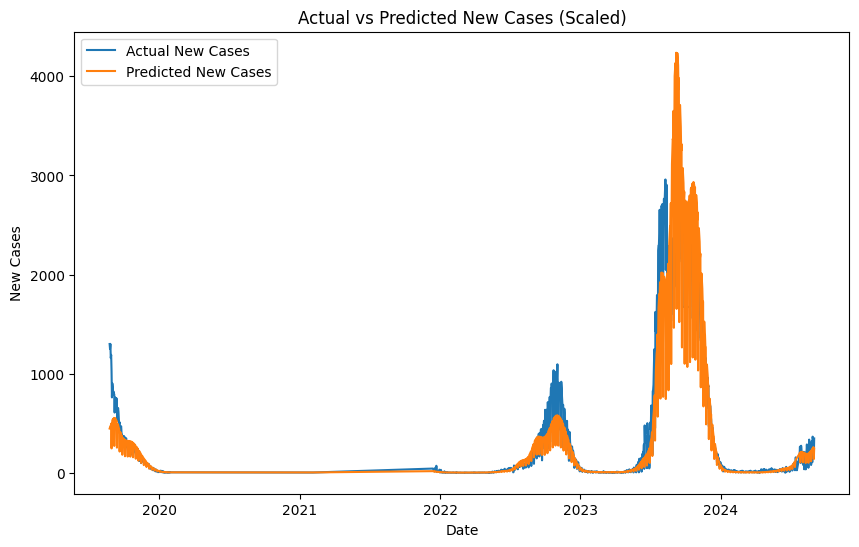

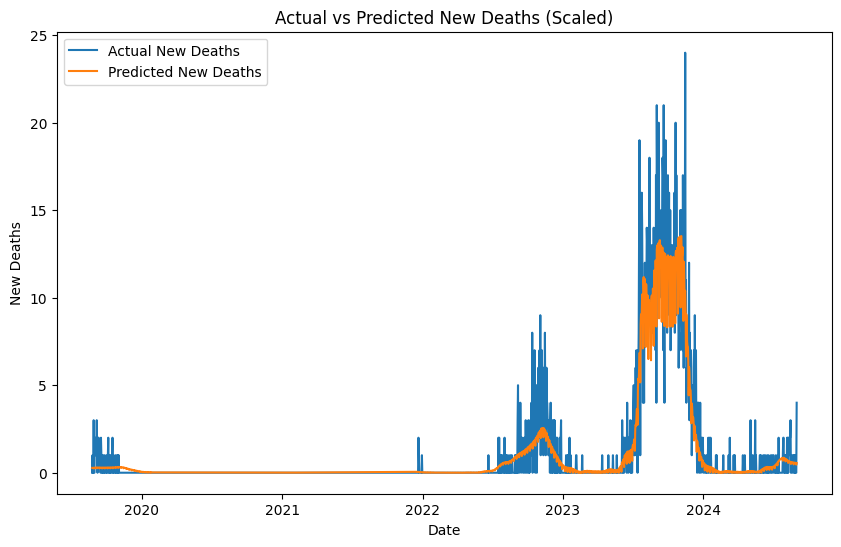

In [15]:
##just ei part###

import pandas as pd
from prophet import Prophet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('Dengue_final_as_MPOX.xlsx')

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Apply log transformation to avoid negative predictions
data['Log_New_Cases'] = np.log1p(data['New_Cases'])  # log1p handles zeros safely
data['Log_New_Deaths'] = np.log1p(data['New_Deaths'])

# Prepare data for Prophet (New Cases)
df_new_cases = data[['Date', 'Log_New_Cases']].rename(columns={'Date': 'ds', 'Log_New_Cases': 'y'})

# Prepare data for Prophet (New Deaths)
df_new_deaths = data[['Date', 'Log_New_Deaths']].rename(columns={'Date': 'ds', 'Log_New_Deaths': 'y'})

# Initialize Prophet model for New Cases with fine-tuned hyperparameters
model_cases = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=2.0
)
model_cases.fit(df_new_cases)

# Initialize Prophet model for New Deaths with fine-tuned hyperparameters
model_deaths = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=2.0
)
model_deaths.fit(df_new_deaths)

# Generate future dates for prediction
future_cases = model_cases.make_future_dataframe(periods=60)
future_deaths = model_deaths.make_future_dataframe(periods=60)

# Forecasting
forecast_cases = model_cases.predict(future_cases)
forecast_deaths = model_deaths.predict(future_deaths)

# Inverse log transformation to bring predictions back to original scale
forecast_cases['yhat'] = np.expm1(forecast_cases['yhat'])  # expm1 reverses log1p
forecast_deaths['yhat'] = np.expm1(forecast_deaths['yhat'])

# Ensure no negative predictions by clipping at 0
forecast_cases['yhat'] = forecast_cases['yhat'].clip(lower=0)
forecast_deaths['yhat'] = forecast_deaths['yhat'].clip(lower=0)

# Merge actual and predicted values for evaluation (New Cases)
df_merged_cases = pd.merge(data[['Date', 'New_Cases']], forecast_cases[['ds', 'yhat']], left_on='Date', right_on='ds', how='left')
df_merged_cases.dropna(inplace=True)

# Merge actual and predicted values for evaluation (New Deaths)
df_merged_deaths = pd.merge(data[['Date', 'New_Deaths']], forecast_deaths[['ds', 'yhat']], left_on='Date', right_on='ds', how='left')
df_merged_deaths.dropna(inplace=True)

# Evaluation metrics for New Cases
rmse_cases = np.sqrt(mean_squared_error(df_merged_cases['New_Cases'], df_merged_cases['yhat']))
mse_cases = mean_squared_error(df_merged_cases['New_Cases'], df_merged_cases['yhat'])
mae_cases = mean_absolute_error(df_merged_cases['New_Cases'], df_merged_cases['yhat'])
r2_cases = r2_score(df_merged_cases['New_Cases'], df_merged_cases['yhat'])

# Evaluation metrics for New Deaths
rmse_deaths = np.sqrt(mean_squared_error(df_merged_deaths['New_Deaths'], df_merged_deaths['yhat']))
mse_deaths = mean_squared_error(df_merged_deaths['New_Deaths'], df_merged_deaths['yhat'])
mae_deaths = mean_absolute_error(df_merged_deaths['New_Deaths'], df_merged_deaths['yhat'])
r2_deaths = r2_score(df_merged_deaths['New_Deaths'], df_merged_deaths['yhat'])

# Print evaluation metrics
print(f"New Cases - RMSE: {rmse_cases}, MSE: {mse_cases}, MAE: {mae_cases}, R-squared: {r2_cases}")
print(f"New Deaths - RMSE: {rmse_deaths}, MSE: {mse_deaths}, MAE: {mae_deaths}, R-squared: {r2_deaths}")

# Plotting the forecast and actuals for New Cases
plt.figure(figsize=(10, 6))
plt.plot(df_merged_cases['Date'], df_merged_cases['New_Cases'], label='Actual New Cases')
plt.plot(df_merged_cases['Date'], df_merged_cases['yhat'], label='Predicted New Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Actual vs Predicted New Cases (Scaled)')
plt.legend()
plt.show()

# Plotting the forecast and actuals for New Deaths
plt.figure(figsize=(10, 6))
plt.plot(df_merged_deaths['Date'], df_merged_deaths['New_Deaths'], label='Actual New Deaths')
plt.plot(df_merged_deaths['Date'], df_merged_deaths['yhat'], label='Predicted New Deaths')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.title('Actual vs Predicted New Deaths (Scaled)')
plt.legend()
plt.show()

Prophet with lag feature and seasonal multiplicative mode


11:34:15 - cmdstanpy - INFO - Chain [1] start processing
11:34:15 - cmdstanpy - INFO - Chain [1] done processing
11:34:15 - cmdstanpy - INFO - Chain [1] start processing
11:34:15 - cmdstanpy - INFO - Chain [1] done processing


New Cases - RMSE: 230.02532078117633, MSE: 52911.64820048307, MAE: 99.99092224771111, R-squared: 0.8831503679594921
New Deaths - RMSE: 1.5905853977543132, MSE: 2.5299619075492465, MAE: 0.781174518087215, R-squared: 0.8317795391132581


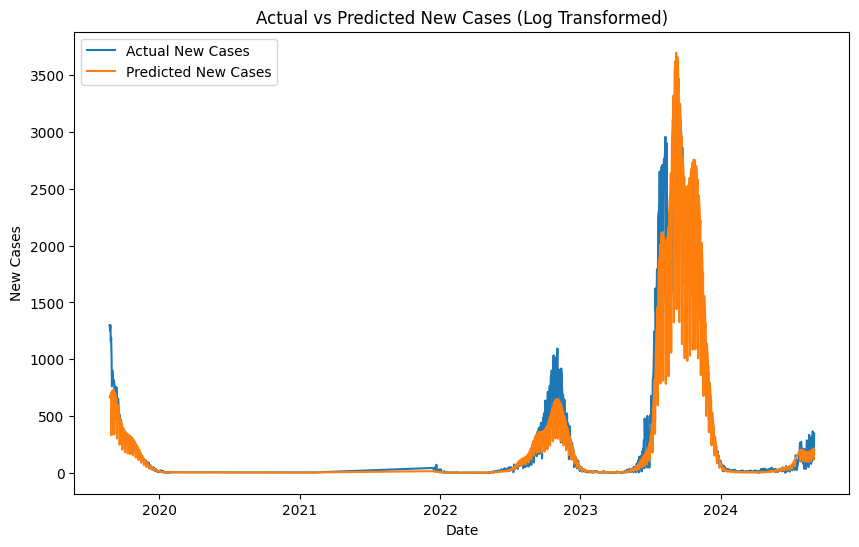

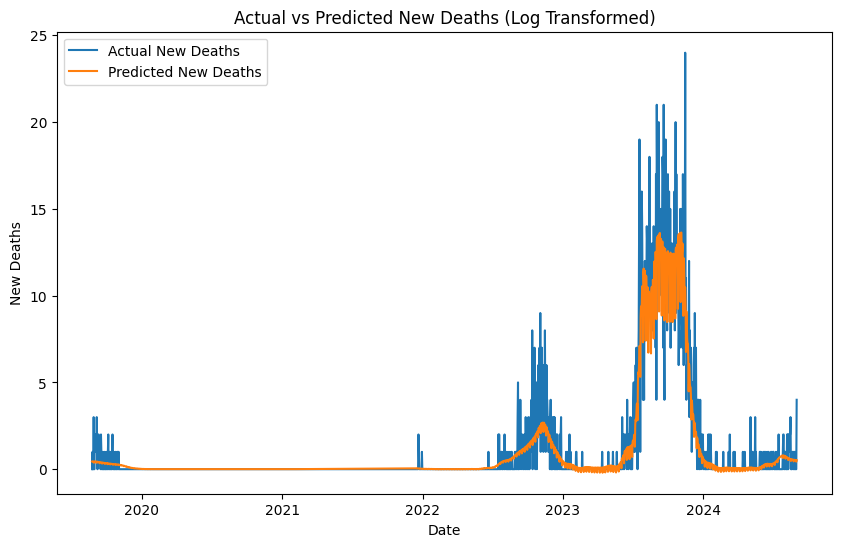

In [17]:


import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
# Load the dataset
data = pd.read_excel('Dengue_final_as_MPOX.xlsx')

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Apply log transformation to stabilize variance
data['Log_New_Cases'] = np.log1p(data['New_Cases'])
data['Log_New_Deaths'] = np.log1p(data['New_Deaths'])

# Prepare data for Prophet (New Cases)
df_new_cases = data[['Date', 'Log_New_Cases']].rename(columns={'Date': 'ds', 'Log_New_Cases': 'y'})

# Prepare data for Prophet (New Deaths)
df_new_deaths = data[['Date', 'Log_New_Deaths']].rename(columns={'Date': 'ds', 'Log_New_Deaths': 'y'})

# Initialize Prophet model for New Cases
model_cases = Prophet(
    seasonality_mode='multiplicative', 
    yearly_seasonality=True, 
    weekly_seasonality=True,
    changepoint_prior_scale=0.1  # Controls flexibility, lower values less flexible
)
model_cases.fit(df_new_cases)

# Initialize Prophet model for New Deaths
model_deaths = Prophet(
    seasonality_mode='multiplicative', 
    yearly_seasonality=True, 
    weekly_seasonality=True,
    changepoint_prior_scale=0.1
)
model_deaths.fit(df_new_deaths)

# Generate future dates for prediction
future_cases = model_cases.make_future_dataframe(periods=60)
future_deaths = model_deaths.make_future_dataframe(periods=60)

# Forecasting
forecast_cases = model_cases.predict(future_cases)
forecast_deaths = model_deaths.predict(future_deaths)

# Inverse log transformation to bring the predictions back to the original scale
forecast_cases['yhat'] = np.expm1(forecast_cases['yhat'])
forecast_deaths['yhat'] = np.expm1(forecast_deaths['yhat'])

# Merge actual and predicted values for evaluation (New Cases)
df_merged_cases = pd.merge(data[['Date', 'New_Cases']], forecast_cases[['ds', 'yhat']], left_on='Date', right_on='ds', how='left')
df_merged_cases.dropna(inplace=True)

# Merge actual and predicted values for evaluation (New Deaths)
df_merged_deaths = pd.merge(data[['Date', 'New_Deaths']], forecast_deaths[['ds', 'yhat']], left_on='Date', right_on='ds', how='left')
df_merged_deaths.dropna(inplace=True)

# Evaluation metrics for New Cases
rmse_cases = np.sqrt(mean_squared_error(df_merged_cases['New_Cases'], df_merged_cases['yhat']))
mse_cases = mean_squared_error(df_merged_cases['New_Cases'], df_merged_cases['yhat'])
mae_cases = mean_absolute_error(df_merged_cases['New_Cases'], df_merged_cases['yhat'])
r2_cases = r2_score(df_merged_cases['New_Cases'], df_merged_cases['yhat'])

# Evaluation metrics for New Deaths
rmse_deaths = np.sqrt(mean_squared_error(df_merged_deaths['New_Deaths'], df_merged_deaths['yhat']))
mse_deaths = mean_squared_error(df_merged_deaths['New_Deaths'], df_merged_deaths['yhat'])
mae_deaths = mean_absolute_error(df_merged_deaths['New_Deaths'], df_merged_deaths['yhat'])
r2_deaths = r2_score(df_merged_deaths['New_Deaths'], df_merged_deaths['yhat'])

# Print evaluation metrics
print(f"New Cases - RMSE: {rmse_cases}, MSE: {mse_cases}, MAE: {mae_cases}, R-squared: {r2_cases}")
print(f"New Deaths - RMSE: {rmse_deaths}, MSE: {mse_deaths}, MAE: {mae_deaths}, R-squared: {r2_deaths}")

# Plotting the forecast and actuals for New Cases
plt.figure(figsize=(10, 6))
plt.plot(df_merged_cases['Date'], df_merged_cases['New_Cases'], label='Actual New Cases')
plt.plot(df_merged_cases['Date'], df_merged_cases['yhat'], label='Predicted New Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Actual vs Predicted New Cases (Log Transformed)')
plt.legend()
plt.show()

# Plotting the forecast and actuals for New Deaths
plt.figure(figsize=(10, 6))
plt.plot(df_merged_deaths['Date'], df_merged_deaths['New_Deaths'], label='Actual New Deaths')
plt.plot(df_merged_deaths['Date'], df_merged_deaths['yhat'], label='Predicted New Deaths')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.title('Actual vs Predicted New Deaths (Log Transformed)')
plt.legend()
plt.show()

Prophet Seasonal Multiplicative Mode with Holidays

11:35:18 - cmdstanpy - INFO - Chain [1] start processing
11:35:19 - cmdstanpy - INFO - Chain [1] done processing
11:35:19 - cmdstanpy - INFO - Chain [1] start processing
11:35:19 - cmdstanpy - INFO - Chain [1] done processing


New Cases - RMSE: 144.6977791236119, MSE: 20937.447283305573, MAE: 96.12126199923269, R-squared: 0.9537619202174191
New Deaths - RMSE: 1.6826638474219662, MSE: 2.8313576234208937, MAE: 1.093521827626046, R-squared: 0.8117393455902135


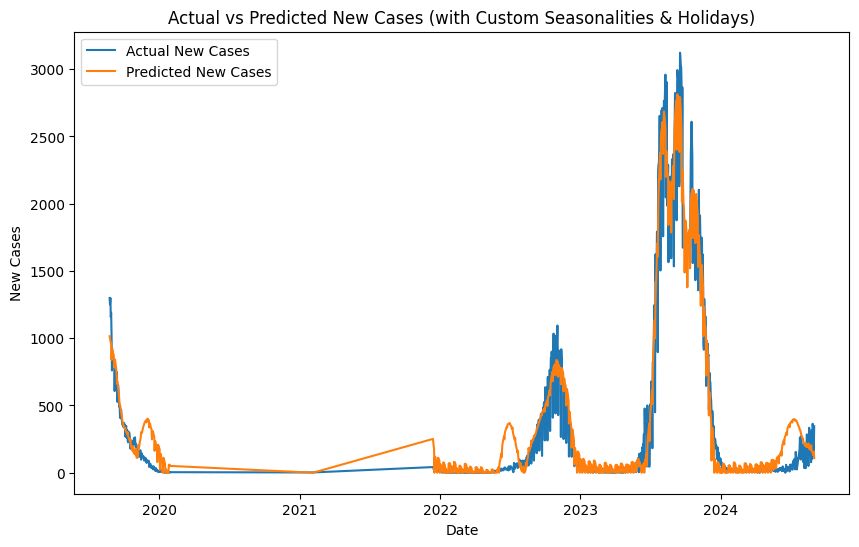

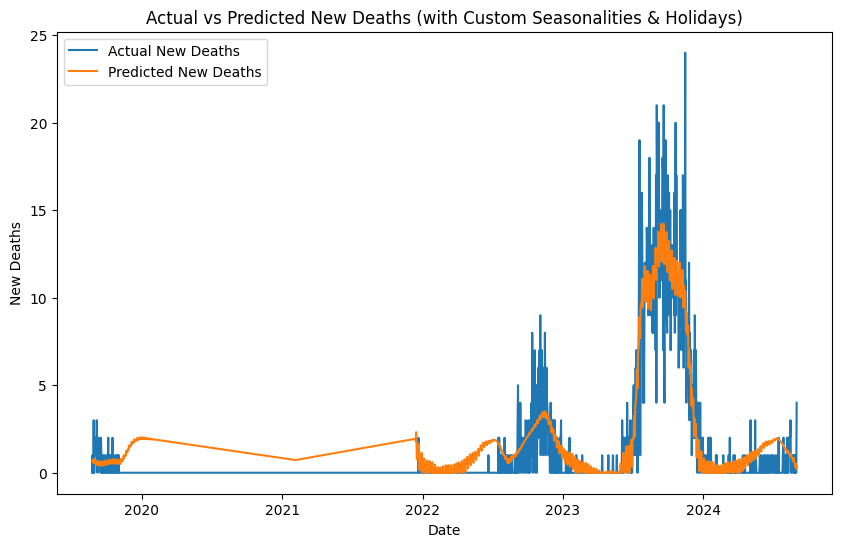

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/7 [00:00<?, ?it/s]

11:35:20 - cmdstanpy - INFO - Chain [1] start processing
11:35:21 - cmdstanpy - INFO - Chain [1] done processing
11:35:21 - cmdstanpy - INFO - Chain [1] start processing
11:35:21 - cmdstanpy - INFO - Chain [1] done processing
11:35:22 - cmdstanpy - INFO - Chain [1] start processing
11:35:22 - cmdstanpy - INFO - Chain [1] done processing
11:35:23 - cmdstanpy - INFO - Chain [1] start processing
11:35:23 - cmdstanpy - INFO - Chain [1] done processing
11:35:23 - cmdstanpy - INFO - Chain [1] start processing
11:35:24 - cmdstanpy - INFO - Chain [1] done processing
11:35:24 - cmdstanpy - INFO - Chain [1] start processing
11:35:25 - cmdstanpy - INFO - Chain [1] done processing
11:35:25 - cmdstanpy - INFO - Chain [1] start processing
11:35:27 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon       mse      rmse       mae      mape     mdape     smape  \
0  6 days  0.396597  0.629760  0.451954  0.829040  0.812840  0.913403   
1  7 days  0.497861  0.705593  0.492577  0.848457  0.732550  0.937782   
2  8 days  0.623648  0.789714  0.555053  0.932762  0.850587  0.987871   
3  9 days  0.739524  0.859956  0.614082  1.018946  1.133226  1.055449   
4 10 days  0.811881  0.901044  0.651576  1.066762  1.133226  1.108376   

   coverage  
0  0.333333  
1  0.333333  
2  0.333333  
3  0.333333  
4  0.333333  


  0%|          | 0/7 [00:00<?, ?it/s]

11:35:28 - cmdstanpy - INFO - Chain [1] start processing
11:35:28 - cmdstanpy - INFO - Chain [1] done processing
11:35:29 - cmdstanpy - INFO - Chain [1] start processing
11:35:29 - cmdstanpy - INFO - Chain [1] done processing
11:35:29 - cmdstanpy - INFO - Chain [1] start processing
11:35:29 - cmdstanpy - INFO - Chain [1] done processing
11:35:30 - cmdstanpy - INFO - Chain [1] start processing
11:35:30 - cmdstanpy - INFO - Chain [1] done processing
11:35:31 - cmdstanpy - INFO - Chain [1] start processing
11:35:31 - cmdstanpy - INFO - Chain [1] done processing
11:35:31 - cmdstanpy - INFO - Chain [1] start processing
11:35:32 - cmdstanpy - INFO - Chain [1] done processing
11:35:32 - cmdstanpy - INFO - Chain [1] start processing
11:35:33 - cmdstanpy - INFO - Chain [1] done processing


  horizon       mse      rmse       mae      mape     mdape     smape  \
0  6 days  0.382034  0.618089  0.455908  1.669347  0.967874  1.167583   
1  7 days  0.429845  0.655626  0.486142  1.706257  0.967874  1.193794   
2  8 days  0.467353  0.683632  0.509706  1.703685  0.967874  1.201048   
3  9 days  0.510343  0.714383  0.529591  1.862296  1.191809  1.236898   
4 10 days  0.752575  0.867511  0.592021  1.960221  1.191809  1.231353   

   coverage  
0  0.580952  
1  0.523810  
2  0.495238  
3  0.447619  
4  0.471429  


In [18]:
import pandas as pd
from prophet import Prophet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
# Load the dataset
data = pd.read_excel('Dengue_final_as_MPOX.xlsx')

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Scaling the New Cases and New Deaths using StandardScaler
scaler_cases = StandardScaler()
scaler_deaths = StandardScaler()

# Add scaled values
data['Scaled_New_Cases'] = scaler_cases.fit_transform(data[['New_Cases']])
data['Scaled_New_Deaths'] = scaler_deaths.fit_transform(data[['New_Deaths']])

# Add a floor to prevent negative predictions
data['floor'] = 0

# Define custom seasonality (e.g., bi-weekly)
model_cases = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    changepoint_prior_scale=0.1,  # Increased to better capture trend changes
    seasonality_prior_scale=1.0,  # Lowered to reduce overfitting
    holidays=pd.DataFrame({
        'holiday': 'health_intervention',
        'ds': pd.to_datetime(['2022-06-15', '2022-09-01']),  # Example dates
        'lower_window': 0,
        'upper_window': 5,
    })
).add_seasonality(name='biweekly', period=14, fourier_order=8)  # Increased Fourier order for better seasonality capture

# Similarly define model for New Deaths
model_deaths = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    changepoint_prior_scale=0.1,  # Increased to better capture trend changes
    seasonality_prior_scale=1.0,  # Lowered to reduce overfitting
    holidays=pd.DataFrame({
        'holiday': 'health_intervention',
        'ds': pd.to_datetime(['2022-06-15', '2022-09-01']),  # Example dates
        'lower_window': 0,
        'upper_window': 5,
    })
)

# Fit the models
model_cases.fit(data[['Date', 'Scaled_New_Cases', 'floor']].rename(columns={'Date': 'ds', 'Scaled_New_Cases': 'y'}))
model_deaths.fit(data[['Date', 'Scaled_New_Deaths', 'floor']].rename(columns={'Date': 'ds', 'Scaled_New_Deaths': 'y'}))

# Generate future dates for prediction
future_cases = model_cases.make_future_dataframe(periods=60)
future_cases['floor'] = 0  # Add the floor constraint to future data
future_deaths = model_deaths.make_future_dataframe(periods=60)
future_deaths['floor'] = 0

# Forecasting
forecast_cases = model_cases.predict(future_cases)
forecast_deaths = model_deaths.predict(future_deaths)

# Inverse scaling to bring predictions back to original scale
forecast_cases['yhat'] = scaler_cases.inverse_transform(forecast_cases[['yhat']])
forecast_deaths['yhat'] = scaler_deaths.inverse_transform(forecast_deaths[['yhat']])

# Handle negative predictions by replacing them with zero
forecast_cases['yhat'] = np.where(forecast_cases['yhat'] < 0, 0, forecast_cases['yhat'])
forecast_deaths['yhat'] = np.where(forecast_deaths['yhat'] < 0, 0, forecast_deaths['yhat'])

# Merge actual and predicted values for evaluation (New Cases)
df_merged_cases = pd.merge(data[['Date', 'New_Cases']], forecast_cases[['ds', 'yhat']], left_on='Date', right_on='ds', how='left')
df_merged_cases.dropna(inplace=True)

# Merge actual and predicted values for evaluation (New Deaths)
df_merged_deaths = pd.merge(data[['Date', 'New_Deaths']], forecast_deaths[['ds', 'yhat']], left_on='Date', right_on='ds', how='left')
df_merged_deaths.dropna(inplace=True)

# Evaluation metrics for New Cases
rmse_cases = np.sqrt(mean_squared_error(df_merged_cases['New_Cases'], df_merged_cases['yhat']))
mse_cases = mean_squared_error(df_merged_cases['New_Cases'], df_merged_cases['yhat'])
mae_cases = mean_absolute_error(df_merged_cases['New_Cases'], df_merged_cases['yhat'])
r2_cases = r2_score(df_merged_cases['New_Cases'], df_merged_cases['yhat'])

# Evaluation metrics for New Deaths
rmse_deaths = np.sqrt(mean_squared_error(df_merged_deaths['New_Deaths'], df_merged_deaths['yhat']))
mse_deaths = mean_squared_error(df_merged_deaths['New_Deaths'], df_merged_deaths['yhat'])
mae_deaths = mean_absolute_error(df_merged_deaths['New_Deaths'], df_merged_deaths['yhat'])
r2_deaths = r2_score(df_merged_deaths['New_Deaths'], df_merged_deaths['yhat'])

# Print evaluation metrics
print(f"New Cases - RMSE: {rmse_cases}, MSE: {mse_cases}, MAE: {mae_cases}, R-squared: {r2_cases}")
print(f"New Deaths - RMSE: {rmse_deaths}, MSE: {mse_deaths}, MAE: {mae_deaths}, R-squared: {r2_deaths}")

# Plotting the forecast and actuals for New Cases
plt.figure(figsize=(10, 6))
plt.plot(df_merged_cases['Date'], df_merged_cases['New_Cases'], label='Actual New Cases')
plt.plot(df_merged_cases['Date'], df_merged_cases['yhat'], label='Predicted New Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Actual vs Predicted New Cases (with Custom Seasonalities & Holidays)')
plt.legend()
plt.show()

# Plotting the forecast and actuals for New Deaths
plt.figure(figsize=(10, 6))
plt.plot(df_merged_deaths['Date'], df_merged_deaths['New_Deaths'], label='Actual New Deaths')
plt.plot(df_merged_deaths['Date'], df_merged_deaths['yhat'], label='Predicted New Deaths')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.title('Actual vs Predicted New Deaths (with Custom Seasonalities & Holidays)')
plt.legend()
plt.show()

# Optional: Perform cross-validation to ensure robustness of the model
from prophet.diagnostics import cross_validation, performance_metrics

df_cv_cases = cross_validation(model_cases, initial='365 days', period='180 days', horizon='60 days')
df_p_cases = performance_metrics(df_cv_cases)
print(df_p_cases.head())

df_cv_deaths = cross_validation(model_deaths, initial='365 days', period='180 days', horizon='60 days')
df_p_deaths = performance_metrics(df_cv_deaths)
print(df_p_deaths.head())

Future Forecast With Custom Seasonality & Holidays

11:36:51 - cmdstanpy - INFO - Chain [1] start processing
11:36:53 - cmdstanpy - INFO - Chain [1] done processing
11:36:54 - cmdstanpy - INFO - Chain [1] start processing
11:36:54 - cmdstanpy - INFO - Chain [1] done processing


New Cases - RMSE: 144.6977791236119, MSE: 20937.447283305573, MAE: 96.12126199923269, R-squared: 0.9537619202174191
New Deaths - RMSE: 1.6826638474219662, MSE: 2.8313576234208937, MAE: 1.093521827626046, R-squared: 0.8117393455902135


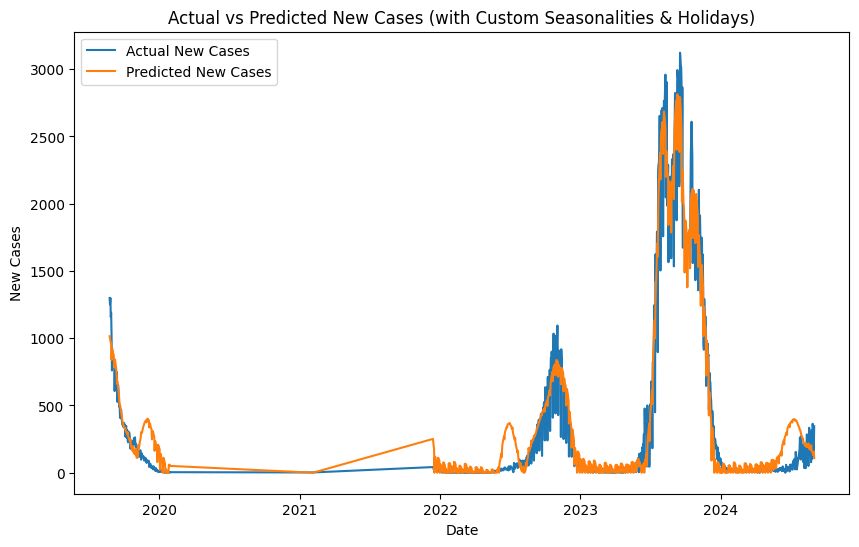

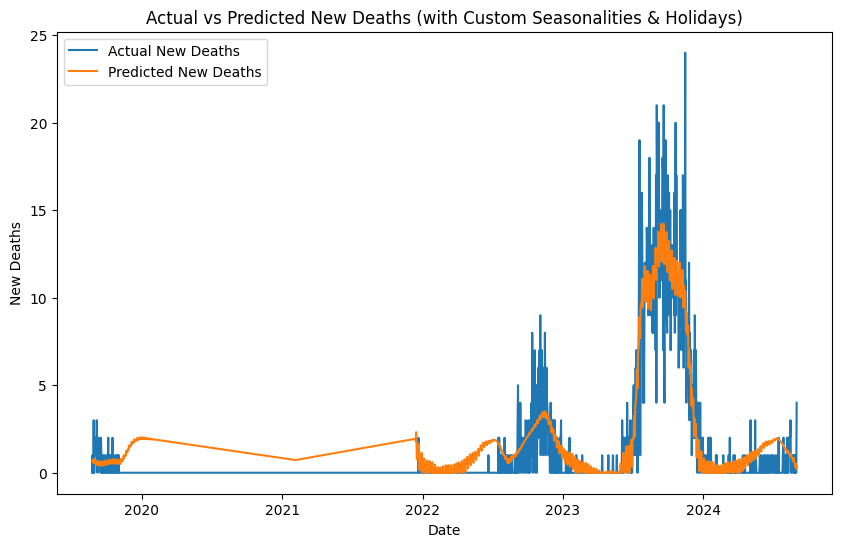

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/7 [00:00<?, ?it/s]

11:36:57 - cmdstanpy - INFO - Chain [1] start processing
11:36:57 - cmdstanpy - INFO - Chain [1] done processing
11:36:58 - cmdstanpy - INFO - Chain [1] start processing
11:36:58 - cmdstanpy - INFO - Chain [1] done processing
11:36:59 - cmdstanpy - INFO - Chain [1] start processing
11:36:59 - cmdstanpy - INFO - Chain [1] done processing
11:37:00 - cmdstanpy - INFO - Chain [1] start processing
11:37:00 - cmdstanpy - INFO - Chain [1] done processing
11:37:01 - cmdstanpy - INFO - Chain [1] start processing
11:37:01 - cmdstanpy - INFO - Chain [1] done processing
11:37:02 - cmdstanpy - INFO - Chain [1] start processing
11:37:03 - cmdstanpy - INFO - Chain [1] done processing
11:37:04 - cmdstanpy - INFO - Chain [1] start processing
11:37:06 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon       mse      rmse       mae      mape     mdape     smape  \
0  6 days  0.396597  0.629760  0.451954  0.829040  0.812840  0.913403   
1  7 days  0.497861  0.705593  0.492577  0.848457  0.732550  0.937782   
2  8 days  0.623648  0.789714  0.555053  0.932762  0.850587  0.987871   
3  9 days  0.739524  0.859956  0.614082  1.018946  1.133226  1.055449   
4 10 days  0.811881  0.901044  0.651576  1.066762  1.133226  1.108376   

   coverage  
0  0.333333  
1  0.333333  
2  0.333333  
3  0.333333  
4  0.333333  


  0%|          | 0/7 [00:00<?, ?it/s]

11:37:07 - cmdstanpy - INFO - Chain [1] start processing
11:37:07 - cmdstanpy - INFO - Chain [1] done processing
11:37:08 - cmdstanpy - INFO - Chain [1] start processing
11:37:08 - cmdstanpy - INFO - Chain [1] done processing
11:37:09 - cmdstanpy - INFO - Chain [1] start processing
11:37:09 - cmdstanpy - INFO - Chain [1] done processing
11:37:09 - cmdstanpy - INFO - Chain [1] start processing
11:37:09 - cmdstanpy - INFO - Chain [1] done processing
11:37:10 - cmdstanpy - INFO - Chain [1] start processing
11:37:10 - cmdstanpy - INFO - Chain [1] done processing
11:37:11 - cmdstanpy - INFO - Chain [1] start processing
11:37:12 - cmdstanpy - INFO - Chain [1] done processing
11:37:13 - cmdstanpy - INFO - Chain [1] start processing
11:37:13 - cmdstanpy - INFO - Chain [1] done processing


  horizon       mse      rmse       mae      mape     mdape     smape  \
0  6 days  0.382034  0.618089  0.455908  1.669347  0.967874  1.167583   
1  7 days  0.429845  0.655626  0.486142  1.706257  0.967874  1.193794   
2  8 days  0.467353  0.683632  0.509706  1.703685  0.967874  1.201048   
3  9 days  0.510343  0.714383  0.529591  1.862296  1.191809  1.236898   
4 10 days  0.752575  0.867511  0.592021  1.960221  1.191809  1.231353   

   coverage  
0  0.604762  
1  0.523810  
2  0.495238  
3  0.447619  
4  0.471429  


In [19]:
import pandas as pd
from prophet import Prophet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('Dengue_final_as_MPOX.xlsx')

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Scaling the New Cases and New Deaths using StandardScaler
scaler_cases = StandardScaler()
scaler_deaths = StandardScaler()

# Add scaled values
data['Scaled_New_Cases'] = scaler_cases.fit_transform(data[['New_Cases']])
data['Scaled_New_Deaths'] = scaler_deaths.fit_transform(data[['New_Deaths']])

# Add a floor to prevent negative predictions
data['floor'] = 0

# Define custom seasonality (e.g., bi-weekly)
model_cases = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    changepoint_prior_scale=0.1,  # Increased to better capture trend changes
    seasonality_prior_scale=1.0,  # Lowered to reduce overfitting
    holidays=pd.DataFrame({
        'holiday': 'health_intervention',
        'ds': pd.to_datetime(['2022-06-15', '2022-09-01']),  # Example dates
        'lower_window': 0,
        'upper_window': 5,
    })
).add_seasonality(name='biweekly', period=14, fourier_order=8)  # Increased Fourier order for better seasonality capture

# Similarly define model for New Deaths
model_deaths = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    changepoint_prior_scale=0.1,  # Increased to better capture trend changes
    seasonality_prior_scale=1.0,  # Lowered to reduce overfitting
    holidays=pd.DataFrame({
        'holiday': 'health_intervention',
        'ds': pd.to_datetime(['2022-06-15', '2022-09-01']),  # Example dates
        'lower_window': 0,
        'upper_window': 5,
    })
)

# Fit the models
model_cases.fit(data[['Date', 'Scaled_New_Cases', 'floor']].rename(columns={'Date': 'ds', 'Scaled_New_Cases': 'y'}))
model_deaths.fit(data[['Date', 'Scaled_New_Deaths', 'floor']].rename(columns={'Date': 'ds', 'Scaled_New_Deaths': 'y'}))

# Generate future dates for prediction
future_cases = model_cases.make_future_dataframe(periods=60)
future_cases['floor'] = 0  # Add the floor constraint to future data
future_deaths = model_deaths.make_future_dataframe(periods=60)
future_deaths['floor'] = 0

# Forecasting
forecast_cases = model_cases.predict(future_cases)
forecast_deaths = model_deaths.predict(future_deaths)

# Inverse scaling to bring predictions back to original scale
forecast_cases['yhat'] = scaler_cases.inverse_transform(forecast_cases[['yhat']])
forecast_deaths['yhat'] = scaler_deaths.inverse_transform(forecast_deaths[['yhat']])

# Handle negative predictions by replacing them with zero
forecast_cases['yhat'] = np.where(forecast_cases['yhat'] < 0, 0, forecast_cases['yhat'])
forecast_deaths['yhat'] = np.where(forecast_deaths['yhat'] < 0, 0, forecast_deaths['yhat'])

# Merge actual and predicted values for evaluation (New Cases)
df_merged_cases = pd.merge(data[['Date', 'New_Cases']], forecast_cases[['ds', 'yhat']], left_on='Date', right_on='ds', how='left')
df_merged_cases.dropna(inplace=True)

# Merge actual and predicted values for evaluation (New Deaths)
df_merged_deaths = pd.merge(data[['Date', 'New_Deaths']], forecast_deaths[['ds', 'yhat']], left_on='Date', right_on='ds', how='left')
df_merged_deaths.dropna(inplace=True)

# Evaluation metrics for New Cases
rmse_cases = np.sqrt(mean_squared_error(df_merged_cases['New_Cases'], df_merged_cases['yhat']))
mse_cases = mean_squared_error(df_merged_cases['New_Cases'], df_merged_cases['yhat'])
mae_cases = mean_absolute_error(df_merged_cases['New_Cases'], df_merged_cases['yhat'])
r2_cases = r2_score(df_merged_cases['New_Cases'], df_merged_cases['yhat'])

# Evaluation metrics for New Deaths
rmse_deaths = np.sqrt(mean_squared_error(df_merged_deaths['New_Deaths'], df_merged_deaths['yhat']))
mse_deaths = mean_squared_error(df_merged_deaths['New_Deaths'], df_merged_deaths['yhat'])
mae_deaths = mean_absolute_error(df_merged_deaths['New_Deaths'], df_merged_deaths['yhat'])
r2_deaths = r2_score(df_merged_deaths['New_Deaths'], df_merged_deaths['yhat'])

# Print evaluation metrics
print(f"New Cases - RMSE: {rmse_cases}, MSE: {mse_cases}, MAE: {mae_cases}, R-squared: {r2_cases}")
print(f"New Deaths - RMSE: {rmse_deaths}, MSE: {mse_deaths}, MAE: {mae_deaths}, R-squared: {r2_deaths}")

# Plotting the forecast and actuals for New Cases
plt.figure(figsize=(10, 6))
plt.plot(df_merged_cases['Date'], df_merged_cases['New_Cases'], label='Actual New Cases')
plt.plot(df_merged_cases['Date'], df_merged_cases['yhat'], label='Predicted New Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Actual vs Predicted New Cases (with Custom Seasonalities & Holidays)')
plt.legend()
plt.show()

# Plotting the forecast and actuals for New Deaths
plt.figure(figsize=(10, 6))
plt.plot(df_merged_deaths['Date'], df_merged_deaths['New_Deaths'], label='Actual New Deaths')
plt.plot(df_merged_deaths['Date'], df_merged_deaths['yhat'], label='Predicted New Deaths')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.title('Actual vs Predicted New Deaths (with Custom Seasonalities & Holidays)')
plt.legend()
plt.show()

# Optional: Perform cross-validation to ensure robustness of the model
from prophet.diagnostics import cross_validation, performance_metrics

df_cv_cases = cross_validation(model_cases, initial='365 days', period='180 days', horizon='60 days')
df_p_cases = performance_metrics(df_cv_cases)
print(df_p_cases.head())

df_cv_deaths = cross_validation(model_deaths, initial='365 days', period='180 days', horizon='60 days')
df_p_deaths = performance_metrics(df_cv_deaths)
print(df_p_deaths.head())

**ENsumblw with prophet**

In [23]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_excel('Dengue_final_as_MPOX.xlsx')
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Prepare data for modeling
data['lag_1_cases'] = data['New_Cases'].shift(1).fillna(0)
data['lag_2_cases'] = data['New_Cases'].shift(2).fillna(0)
data['lag_1_deaths'] = data['New_Deaths'].shift(1).fillna(0)
data['lag_2_deaths'] = data['New_Deaths'].shift(2).fillna(0)

# Drop rows with missing values
data = data.dropna()

# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)


In [24]:
# Prophet Model for New Cases
prophet_cases = Prophet(seasonality_mode='multiplicative', yearly_seasonality=True, weekly_seasonality=True)
prophet_cases.fit(train_data[['Date', 'New_Cases']].rename(columns={'Date': 'ds', 'New_Cases': 'y'}))

# Prophet Model for New Deaths
prophet_deaths = Prophet(seasonality_mode='multiplicative', yearly_seasonality=True, weekly_seasonality=True)
prophet_deaths.fit(train_data[['Date', 'New_Deaths']].rename(columns={'Date': 'ds', 'New_Deaths': 'y'}))

# Make future predictions for Prophet
future_dates = prophet_cases.make_future_dataframe(periods=len(test_data), freq='D')
forecast_cases = prophet_cases.predict(future_dates)
forecast_deaths = prophet_deaths.predict(future_dates)

# Get the predicted values from Prophet
prophet_cases_preds = forecast_cases[['ds', 'yhat']].tail(len(test_data))['yhat'].values
prophet_deaths_preds = forecast_deaths[['ds', 'yhat']].tail(len(test_data))['yhat'].values

11:42:20 - cmdstanpy - INFO - Chain [1] start processing
11:42:21 - cmdstanpy - INFO - Chain [1] done processing
11:42:21 - cmdstanpy - INFO - Chain [1] start processing
11:42:21 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
from pmdarima import auto_arima

# SARIMA for New Cases
sarima_cases = auto_arima(train_data['New_Cases'], seasonal=True, stepwise=True)
sarima_cases_preds = sarima_cases.predict(n_periods=len(test_data))

# SARIMA for New Deaths
sarima_deaths = auto_arima(train_data['New_Deaths'], seasonal=True, stepwise=True)
sarima_deaths_preds = sarima_deaths.predict(n_periods=len(test_data))

In [29]:
# XGBoost for New Cases
xgb_cases = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_cases.fit(train_data[['lag_1_cases', 'lag_2_cases']], train_data['New_Cases'])
xgb_cases_preds = xgb_cases.predict(test_data[['lag_1_cases', 'lag_2_cases']])

# XGBoost for New Deaths
xgb_deaths = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_deaths.fit(train_data[['lag_1_deaths', 'lag_2_deaths']], train_data['New_Deaths'])
xgb_deaths_preds = xgb_deaths.predict(test_data[['lag_1_deaths', 'lag_2_deaths']])

In [30]:
# Combining predictions for New Cases
final_cases_preds = 0.4 * prophet_cases_preds + 0.3 * sarima_cases_preds + 0.3 * xgb_cases_preds

# Combining predictions for New Deaths
final_deaths_preds = 0.4 * prophet_deaths_preds + 0.3 * sarima_deaths_preds + 0.3 * xgb_deaths_preds

# Evaluation metrics for New Cases
rmse_cases = np.sqrt(mean_squared_error(test_data['New_Cases'], final_cases_preds))
mse_cases = mean_squared_error(test_data['New_Cases'], final_cases_preds)
mae_cases = mean_absolute_error(test_data['New_Cases'], final_cases_preds)
r2_cases = r2_score(test_data['New_Cases'], final_cases_preds)

# Evaluation metrics for New Deaths
rmse_deaths = np.sqrt(mean_squared_error(test_data['New_Deaths'], final_deaths_preds))
mse_deaths = mean_squared_error(test_data['New_Deaths'], final_deaths_preds)
mae_deaths = mean_absolute_error(test_data['New_Deaths'], final_deaths_preds)
r2_deaths = r2_score(test_data['New_Deaths'], final_deaths_preds)

# Print results
print(f"New Cases - RMSE: {rmse_cases}, MSE: {mse_cases}, MAE: {mae_cases}, R-squared: {r2_cases}")
print(f"New Deaths - RMSE: {rmse_deaths}, MSE: {mse_deaths}, MAE: {mae_deaths}, R-squared: {r2_deaths}")

New Cases - RMSE: 585.1441993414002, MSE: 342393.73402288824, MAE: 313.18332581651936, R-squared: -53.04818907955619
New Deaths - RMSE: 3.0578032883956388, MSE: 9.35016095052318, MAE: 1.806165565765928, R-squared: -18.880366329689565


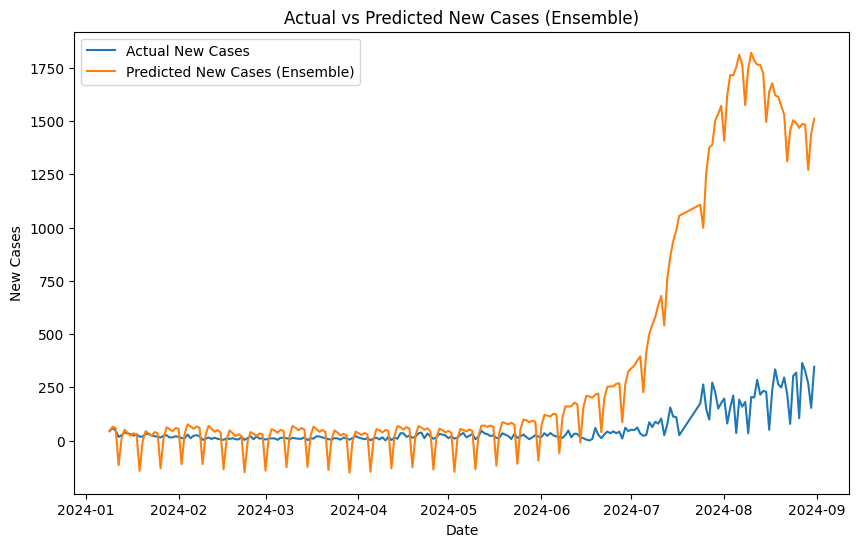

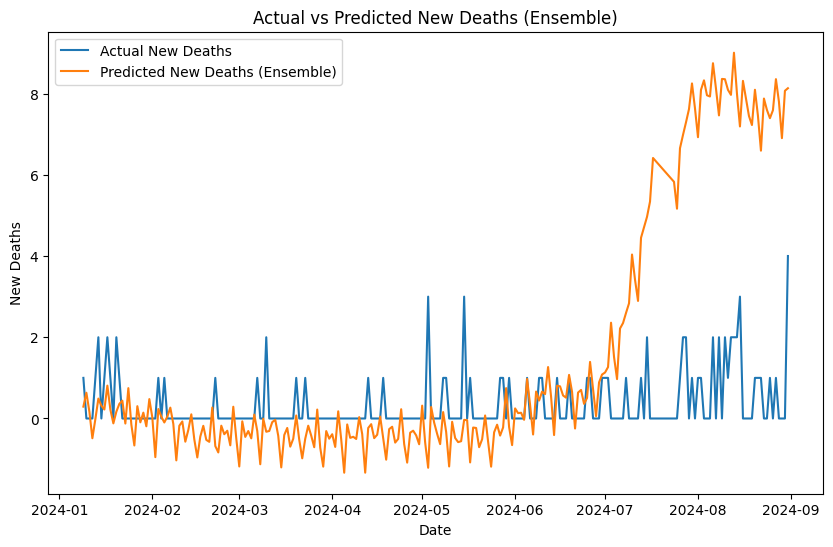

In [31]:
# Plotting the forecast and actuals for New Cases
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], test_data['New_Cases'], label='Actual New Cases')
plt.plot(test_data['Date'], final_cases_preds, label='Predicted New Cases (Ensemble)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Actual vs Predicted New Cases (Ensemble)')
plt.legend()
plt.show()

# Plotting the forecast and actuals for New Deaths
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], test_data['New_Deaths'], label='Actual New Deaths')
plt.plot(test_data['Date'], final_deaths_preds, label='Predicted New Deaths (Ensemble)')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.title('Actual vs Predicted New Deaths (Ensemble)')
plt.legend()
plt.show()

In [32]:
from pmdarima import auto_arima

# Auto ARIMA for New Cases
sarima_cases = auto_arima(train_data['New_Cases'], seasonal=True, stepwise=True, trace=True)

# Auto ARIMA for New Deaths
sarima_deaths = auto_arima(train_data['New_Deaths'], seasonal=True, stepwise=True, trace=True)

# SARIMA Predictions
sarima_cases_preds = sarima_cases.predict(n_periods=len(test_data))
sarima_deaths_preds = sarima_deaths.predict(n_periods=len(test_data))


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11856.495, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12062.746, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11939.413, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11873.761, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12060.802, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11854.504, Time=1.38 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11870.835, Time=0.94 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11871.342, Time=0.79 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11856.497, Time=2.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=11872.380, Time=1.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11872.391, Time=1.71 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11716.548, Time=1.83 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=11700.240, Time=1.45 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11857.009, Time=1.68 sec
 ARIMA(4,1,3)(0,0,0

In [33]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Prepare the training data for XGBoost
X_train_cases = train_data[['lag_1_cases', 'lag_2_cases']]
y_train_cases = train_data['New_Cases']
X_train_deaths = train_data[['lag_1_deaths', 'lag_2_deaths']]
y_train_deaths = train_data['New_Deaths']

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Hyperparameter tuning for XGBoost on New Cases
xgb_cases = XGBRegressor()
grid_cases = GridSearchCV(xgb_cases, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_cases.fit(X_train_cases, y_train_cases)
best_xgb_cases = grid_cases.best_estimator_

# Hyperparameter tuning for XGBoost on New Deaths
xgb_deaths = XGBRegressor()
grid_deaths = GridSearchCV(xgb_deaths, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_deaths.fit(X_train_deaths, y_train_deaths)
best_xgb_deaths = grid_deaths.best_estimator_

# Make predictions
xgb_cases_preds = best_xgb_cases.predict(test_data[['lag_1_cases', 'lag_2_cases']])
xgb_deaths_preds = best_xgb_deaths.predict(test_data[['lag_1_deaths', 'lag_2_deaths']])


In [34]:
# Prophet Model for New Cases
prophet_cases = Prophet(seasonality_mode='multiplicative', yearly_seasonality=True, weekly_seasonality=True)
prophet_cases.fit(train_data[['Date', 'New_Cases']].rename(columns={'Date': 'ds', 'New_Cases': 'y'}))

# Prophet Model for New Deaths
prophet_deaths = Prophet(seasonality_mode='multiplicative', yearly_seasonality=True, weekly_seasonality=True)
prophet_deaths.fit(train_data[['Date', 'New_Deaths']].rename(columns={'Date': 'ds', 'New_Deaths': 'y'}))

# Make future predictions for Prophet
future_dates = prophet_cases.make_future_dataframe(periods=len(test_data), freq='D')
forecast_cases = prophet_cases.predict(future_dates)
forecast_deaths = prophet_deaths.predict(future_dates)

# Get the predicted values from Prophet
prophet_cases_preds = forecast_cases[['ds', 'yhat']].tail(len(test_data))['yhat'].values
prophet_deaths_preds = forecast_deaths[['ds', 'yhat']].tail(len(test_data))['yhat'].values


11:50:15 - cmdstanpy - INFO - Chain [1] start processing
11:50:15 - cmdstanpy - INFO - Chain [1] done processing
11:50:16 - cmdstanpy - INFO - Chain [1] start processing
11:50:16 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

# First, make predictions with SARIMA and treat them as features
sarima_cases_preds = sarima_cases.predict(n_periods=len(test_data))
sarima_deaths_preds = sarima_deaths.predict(n_periods=len(test_data))

# Prepare the stacking features (SARIMA predictions are treated as features)
X_train_cases_stacking = np.column_stack([prophet_cases_preds, xgb_cases_preds, sarima_cases_preds])
X_train_deaths_stacking = np.column_stack([prophet_deaths_preds, xgb_deaths_preds, sarima_deaths_preds])

# Prepare the stacking regressor (Prophet, XGBoost are used as regressors)
stacking_cases = StackingRegressor(
    estimators=[
        ('prophet', best_xgb_cases),  # XGBoost model
        ('xgb', best_xgb_cases),  # XGBoost model
    ],
    final_estimator=Ridge()
)

stacking_deaths = StackingRegressor(
    estimators=[
        ('prophet', best_xgb_deaths),  # XGBoost model
        ('xgb', best_xgb_deaths),  # XGBoost model
    ],
    final_estimator=Ridge()
)

# Train the stacking model using SARIMA predictions as features
stacking_cases.fit(X_train_cases_stacking, test_data['New_Cases'])
stacking_deaths.fit(X_train_deaths_stacking, test_data['New_Deaths'])

# Make predictions with the stacking model
stacked_cases_preds = stacking_cases.predict(X_train_cases_stacking)
stacked_deaths_preds = stacking_deaths.predict(X_train_deaths_stacking)


In [36]:
# Evaluation metrics for New Cases
rmse_cases = np.sqrt(mean_squared_error(test_data['New_Cases'], stacked_cases_preds))
mse_cases = mean_squared_error(test_data['New_Cases'], stacked_cases_preds)
mae_cases = mean_absolute_error(test_data['New_Cases'], stacked_cases_preds)
r2_cases = r2_score(test_data['New_Cases'], stacked_cases_preds)

# Evaluation metrics for New Deaths
rmse_deaths = np.sqrt(mean_squared_error(test_data['New_Deaths'], stacked_deaths_preds))
mse_deaths = mean_squared_error(test_data['New_Deaths'], stacked_deaths_preds)
mae_deaths = mean_absolute_error(test_data['New_Deaths'], stacked_deaths_preds)
r2_deaths = r2_score(test_data['New_Deaths'], stacked_deaths_preds)

# Print results
print(f"New Cases - RMSE: {rmse_cases}, MSE: {mse_cases}, MAE: {mae_cases}, R-squared: {r2_cases}")
print(f"New Deaths - RMSE: {rmse_deaths}, MSE: {mse_deaths}, MAE: {mae_deaths}, R-squared: {r2_deaths}")


New Cases - RMSE: 137.5976650630268, MSE: 18933.117430796905, MAE: 66.32443422649217, R-squared: -1.9886665344238281
New Deaths - RMSE: 0.6075942569451802, MSE: 0.3691707810727657, MAE: 0.47091860550901166, R-squared: 0.2150667905807495


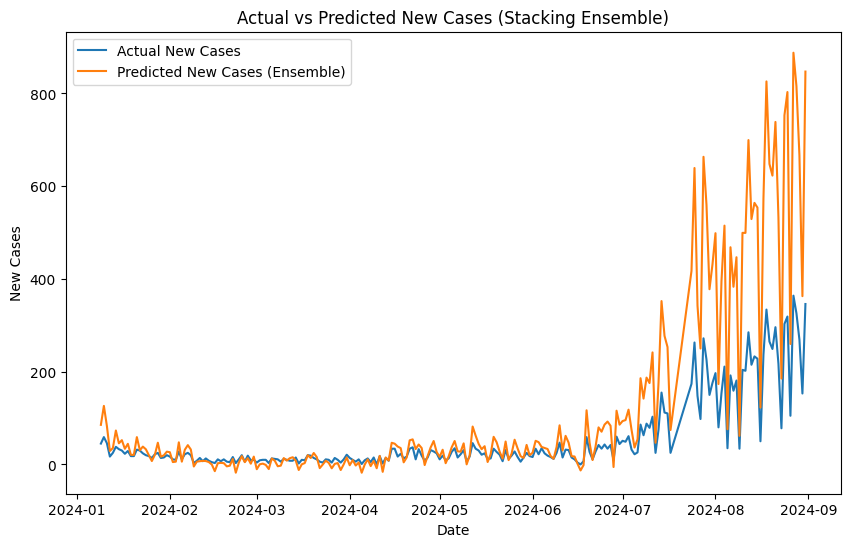

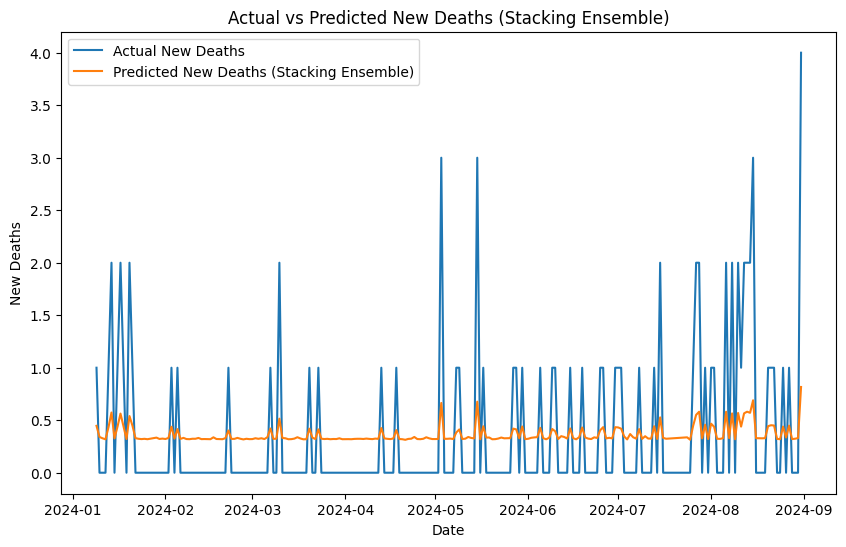

In [37]:
# Plotting the forecast and actuals for New Cases
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], test_data['New_Cases'], label='Actual New Cases')
plt.plot(test_data['Date'], stacked_cases_preds, label='Predicted New Cases (Ensemble)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Actual vs Predicted New Cases (Stacking Ensemble)')
plt.legend()
plt.show()

# Plotting the forecast and actuals for New Deaths
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], test_data['New_Deaths'], label='Actual New Deaths')
plt.plot(test_data['Date'], stacked_deaths_preds, label='Predicted New Deaths (Stacking Ensemble)')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.title('Actual vs Predicted New Deaths (Stacking Ensemble)')
plt.legend()
plt.show()


New Ensamble

In [38]:
# Necessary imports
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_excel('Dengue_final_as_MPOX.xlsx')
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Remove outliers based on quantiles
q_low_cases = data['New_Cases'].quantile(0.01)
q_high_cases = data['New_Cases'].quantile(0.99)
q_low_deaths = data['New_Deaths'].quantile(0.01)
q_high_deaths = data['New_Deaths'].quantile(0.99)

data = data[(data['New_Cases'] > q_low_cases) & (data['New_Cases'] < q_high_cases)]
data = data[(data['New_Deaths'] > q_low_deaths) & (data['New_Deaths'] < q_high_deaths)]

# Add lag features for short-term dependencies
data['lag_1_cases'] = data['New_Cases'].shift(1).fillna(0)
data['lag_2_cases'] = data['New_Cases'].shift(2).fillna(0)
data['lag_1_deaths'] = data['New_Deaths'].shift(1).fillna(0)
data['lag_2_deaths'] = data['New_Deaths'].shift(2).fillna(0)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Display first few rows of the training data
train_data.head()


,Date,Total_Cases,Total_Deaths,New_Cases,New_Deaths,lag_1_cases,lag_2_cases,lag_1_deaths,lag_2_deaths
1,2019-08-26,7191,1,1251,1,0.0,0.0,0.0,0.0
4,2019-08-29,10836,4,1189,3,1251.0,0.0,1.0,0.0
7,2019-09-01,13523,6,902,2,1189.0,1251.0,3.0,1.0
8,2019-09-02,14388,7,865,1,902.0,1189.0,2.0,3.0
9,2019-09-03,15171,8,783,1,865.0,902.0,1.0,2.0


In [39]:
from prophet import Prophet

# Prophet Model for New Cases
prophet_cases = Prophet(yearly_seasonality=True, weekly_seasonality=True, changepoint_prior_scale=0.01)
prophet_cases.fit(train_data[['Date', 'New_Cases']].rename(columns={'Date': 'ds', 'New_Cases': 'y'}))

# Prophet Model for New Deaths
prophet_deaths = Prophet(yearly_seasonality=True, weekly_seasonality=True, changepoint_prior_scale=0.01)
prophet_deaths.fit(train_data[['Date', 'New_Deaths']].rename(columns={'Date': 'ds', 'New_Deaths': 'y'}))

# Predictions
future_dates = prophet_cases.make_future_dataframe(periods=len(test_data))
prophet_cases_preds = prophet_cases.predict(future_dates)['yhat'][-len(test_data):]
prophet_deaths_preds = prophet_deaths.predict(future_dates)['yhat'][-len(test_data):]

# Evaluate Prophet Results
prophet_rmse_cases = np.sqrt(mean_squared_error(test_data['New_Cases'], prophet_cases_preds))
prophet_rmse_deaths = np.sqrt(mean_squared_error(test_data['New_Deaths'], prophet_deaths_preds))
print(f"Prophet New Cases RMSE: {prophet_rmse_cases}")
print(f"Prophet New Deaths RMSE: {prophet_rmse_deaths}")

11:51:58 - cmdstanpy - INFO - Chain [1] start processing
11:51:58 - cmdstanpy - INFO - Chain [1] done processing
11:51:59 - cmdstanpy - INFO - Chain [1] start processing
11:51:59 - cmdstanpy - INFO - Chain [1] done processing


Prophet New Cases RMSE: 533.729863058504
Prophet New Deaths RMSE: 2.7463339475102995


In [40]:
from pmdarima import auto_arima

# SARIMA for New Cases
sarima_cases = auto_arima(train_data['New_Cases'], seasonal=True, stepwise=True, trace=True)
sarima_cases_preds = sarima_cases.predict(n_periods=len(test_data))

# SARIMA for New Deaths
sarima_deaths = auto_arima(train_data['New_Deaths'], seasonal=True, stepwise=True, trace=True)
sarima_deaths_preds = sarima_deaths.predict(n_periods=len(test_data))

# Evaluate SARIMA Results
sarima_rmse_cases = np.sqrt(mean_squared_error(test_data['New_Cases'], sarima_cases_preds))
sarima_rmse_deaths = np.sqrt(mean_squared_error(test_data['New_Deaths'], sarima_deaths_preds))
print(f"SARIMA New Cases RMSE: {sarima_rmse_cases}")
print(f"SARIMA New Deaths RMSE: {sarima_rmse_deaths}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4261.378, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4313.005, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4279.182, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4258.518, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4311.035, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4258.476, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4259.430, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4259.411, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4258.031, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4259.314, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4255.361, Time=0.46 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4251.759, Time=0.63 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4256.792, Time=1.35 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=4255.862, Time=1.33 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1403.649, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1570.633, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1474.104, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1400.083, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1568.655, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1399.918, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1401.666, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1395.394, Time=0.43 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1399.790, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1403.667, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1401.670, Time=0.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1397.679, Time=0.67 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1393.397, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1397.933, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1398.063, Time=0.05 sec
 ARIMA(2,1

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [41]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Grid Search for XGBoost hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
xgb_cases = XGBRegressor()
grid_cases = GridSearchCV(xgb_cases, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_cases.fit(train_data[['lag_1_cases', 'lag_2_cases']], train_data['New_Cases'])

xgb_deaths = XGBRegressor()
grid_deaths = GridSearchCV(xgb_deaths, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_deaths.fit(train_data[['lag_1_deaths', 'lag_2_deaths']], train_data['New_Deaths'])

# Predictions for XGBoost
xgb_cases_preds = grid_cases.best_estimator_.predict(test_data[['lag_1_cases', 'lag_2_cases']])
xgb_deaths_preds = grid_deaths.best_estimator_.predict(test_data[['lag_1_deaths', 'lag_2_deaths']])

# Evaluate XGBoost Results
xgb_rmse_cases = np.sqrt(mean_squared_error(test_data['New_Cases'], xgb_cases_preds))
xgb_rmse_deaths = np.sqrt(mean_squared_error(test_data['New_Deaths'], xgb_deaths_preds))
print(f"XGBoost New Cases RMSE: {xgb_rmse_cases}")
print(f"XGBoost New Deaths RMSE: {xgb_rmse_deaths}")


XGBoost New Cases RMSE: 64.37683043118159
XGBoost New Deaths RMSE: 1.4323552115503926


In [42]:
# Weighting based on performance
weights = {
    'prophet': 0.4,  # Give Prophet more weight if it performs better in capturing trends
    'sarima': 0.3,   # SARIMA for seasonality and short-term patterns
    'xgb': 0.3       # XGBoost for short-term fluctuations
}

# Final ensemble predictions (weighted average)
final_cases_preds = (weights['prophet'] * prophet_cases_preds) + (weights['sarima'] * sarima_cases_preds) + (weights['xgb'] * xgb_cases_preds)
final_deaths_preds = (weights['prophet'] * prophet_deaths_preds) + (weights['sarima'] * sarima_deaths_preds) + (weights['xgb'] * xgb_deaths_preds)

# Evaluate Ensemble
rmse_cases_ensemble = np.sqrt(mean_squared_error(test_data['New_Cases'], final_cases_preds))
rmse_deaths_ensemble = np.sqrt(mean_squared_error(test_data['New_Deaths'], final_deaths_preds))

print(f"Ensemble New Cases RMSE: {rmse_cases_ensemble}")
print(f"Ensemble New Deaths RMSE: {rmse_deaths_ensemble}")


Ensemble New Cases RMSE: 329.8468228441784
Ensemble New Deaths RMSE: 1.8283953847009515


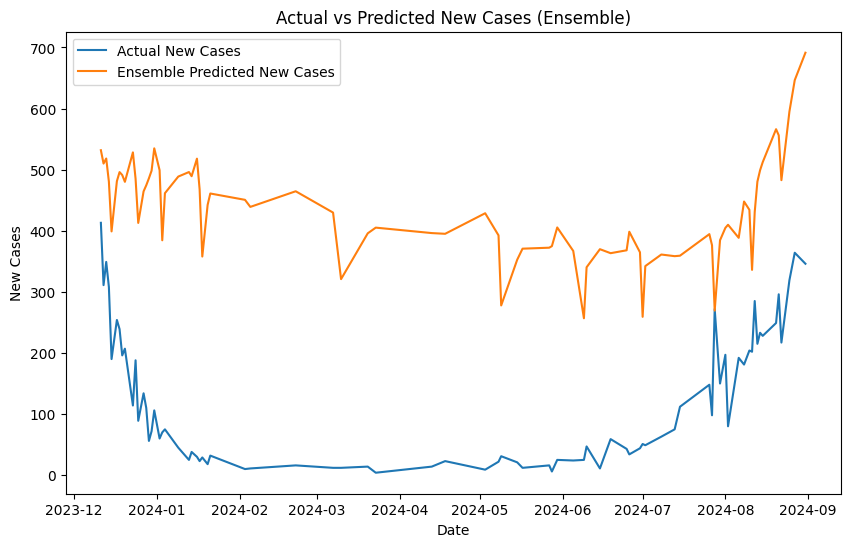

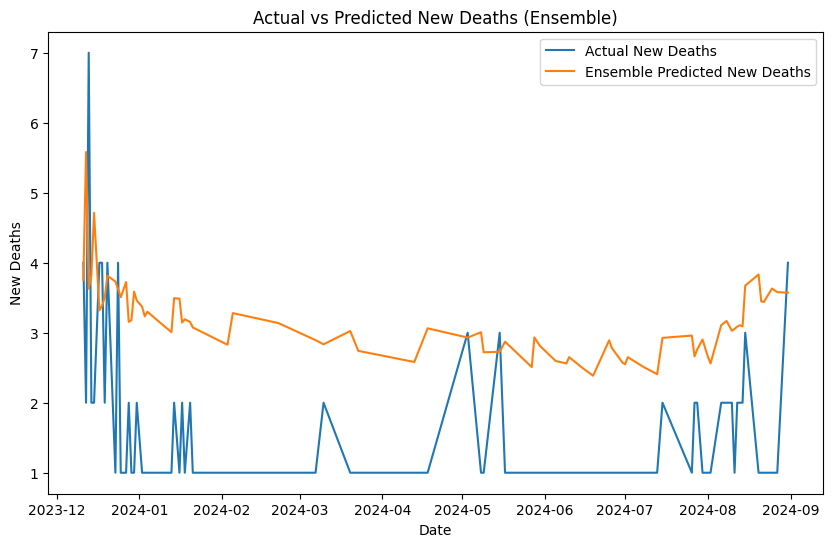

In [43]:
# Plotting the forecast and actuals for New Cases
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], test_data['New_Cases'], label='Actual New Cases')
plt.plot(test_data['Date'], final_cases_preds, label='Ensemble Predicted New Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Actual vs Predicted New Cases (Ensemble)')
plt.legend()
plt.show()

# Plotting the forecast and actuals for New Deaths
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], test_data['New_Deaths'], label='Actual New Deaths')
plt.plot(test_data['Date'], final_deaths_preds, label='Ensemble Predicted New Deaths')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.title('Actual vs Predicted New Deaths (Ensemble)')
plt.legend()
plt.show()


Deep Learning Way

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the dataset
data = pd.read_excel('Dengue_final_as_MPOX.xlsx')
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Remove outliers based on quantiles
q_low_cases = data['New_Cases'].quantile(0.01)
q_high_cases = data['New_Cases'].quantile(0.99)
q_low_deaths = data['New_Deaths'].quantile(0.01)
q_high_deaths = data['New_Deaths'].quantile(0.99)

data = data[(data['New_Cases'] > q_low_cases) & (data['New_Cases'] < q_high_cases)]
data = data[(data['New_Deaths'] > q_low_deaths) & (data['New_Deaths'] < q_high_deaths)]

# Prepare features and targets for LSTM
data = data[['Date', 'New_Cases', 'New_Deaths']]
data.set_index('Date', inplace=True)

# Scale the data
scaler_cases = MinMaxScaler(feature_range=(0, 1))
scaled_cases = scaler_cases.fit_transform(data[['New_Cases']])

scaler_deaths = MinMaxScaler(feature_range=(0, 1))
scaled_deaths = scaler_deaths.fit_transform(data[['New_Deaths']])

# Convert data to time-series format for LSTM
def create_lstm_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Create datasets for cases and deaths
time_step = 7  # Considering 7 days of history for predictions
X_cases, Y_cases = create_lstm_dataset(scaled_cases, time_step)
X_deaths, Y_deaths = create_lstm_dataset(scaled_deaths, time_step)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_cases = X_cases.reshape(X_cases.shape[0], X_cases.shape[1], 1)
X_deaths = X_deaths.reshape(X_deaths.shape[0], X_deaths.shape[1], 1)

# Split into train and test
split_ratio = 0.8
split_idx_cases = int(len(X_cases) * split_ratio)
split_idx_deaths = int(len(X_deaths) * split_ratio)

X_train_cases, X_test_cases = X_cases[:split_idx_cases], X_cases[split_idx_cases:]
Y_train_cases, Y_test_cases = Y_cases[:split_idx_cases], Y_cases[split_idx_cases:]

X_train_deaths, X_test_deaths = X_deaths[:split_idx_deaths], X_deaths[split_idx_deaths:]
Y_train_deaths, Y_test_deaths = Y_deaths[:split_idx_deaths], Y_deaths[split_idx_deaths:]

In [46]:
#gpt# vai er ta run hoccchilo na#
# Import necessary libraries
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Example dataset (replace with your actual dataset)
cases_data = np.random.rand(1000, 1)  # Replace with actual data

# Scale the data
scaler_cases = MinMaxScaler(feature_range=(0, 1))
scaled_cases_data = scaler_cases.fit_transform(cases_data)

# Define the time step
time_step = 10  # The number of time steps for LSTM input
X, Y = [], []

# Create the sequences for LSTM
for i in range(time_step, len(scaled_cases_data)):
    X.append(scaled_cases_data[i-time_step:i, 0])  # Create input sequences
    Y.append(scaled_cases_data[i, 0])  # Create output sequences (next step)

# Convert to numpy arrays
X, Y = np.array(X), np.array(Y)

# Reshape X for LSTM input (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape to (samples, time steps, 1 feature)

# Split the data into training and testing sets
X_train_cases, X_test_cases, Y_train_cases, Y_test_cases = train_test_split(X, Y, test_size=0.2, random_state=42)

# LSTM model for New Cases
model_cases = Sequential()
model_cases.add(LSTM(100, return_sequences=True, input_shape=(time_step, 1)))
model_cases.add(Dropout(0.2))
model_cases.add(LSTM(50, return_sequences=False))
model_cases.add(Dropout(0.2))
model_cases.add(Dense(1))

# Compile the model
model_cases.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_cases.fit(X_train_cases, Y_train_cases, epochs=20, batch_size=32, verbose=1)

# Predict on test data
pred_cases = model_cases.predict(X_test_cases)

# Reshape Y_test_cases before inverse transformation
Y_test_cases = Y_test_cases.reshape(-1, 1)

# Inverse transform the predictions and actual values to original scale
pred_cases = scaler_cases.inverse_transform(pred_cases)
Y_test_cases = scaler_cases.inverse_transform(Y_test_cases)

# Calculate RMSE for New Cases
rmse_cases = np.sqrt(mean_squared_error(Y_test_cases, pred_cases))
print(f"LSTM New Cases RMSE: {rmse_cases}")


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.1888
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0932
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0884
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0944
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0845
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0902
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0886
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0876
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0924
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0835
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0878
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0936
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0905
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0847
Epoch 15/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0866
Epoc

In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the dataset (update the file path to your dataset)
# Ensure that the dataset has a column named 'New_Deaths'
# Load the dataset
data = pd.read_excel('Dengue_final_as_MPOX.xlsx')

# Check if the 'New_Deaths' column exists
if 'New_Deaths' not in data.columns:
    raise ValueError("'New_Deaths' column is missing from the dataset!")

# Define the column from your data representing New Deaths
new_deaths = data['New_Deaths'].values

# Scaling the data
scaler_deaths = MinMaxScaler(feature_range=(0, 1))
new_deaths_scaled = scaler_deaths.fit_transform(new_deaths.reshape(-1, 1))

# Create a function to prepare your dataset for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Define the time_step for LSTM
time_step = 10
X, Y = create_dataset(new_deaths_scaled, time_step)

# Reshape the input to be [samples, time steps, features] as required by LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the dataset into training and testing data
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train_deaths, X_test_deaths = X[0:train_size], X[train_size:len(X)]
Y_train_deaths, Y_test_deaths = Y[0:train_size], Y[train_size:len(Y)]

# Define the LSTM model
model_deaths = Sequential()
model_deaths.add(LSTM(100, return_sequences=True, input_shape=(time_step, 1)))
model_deaths.add(Dropout(0.2))
model_deaths.add(LSTM(50, return_sequences=False))
model_deaths.add(Dropout(0.2))
model_deaths.add(Dense(1))

# Compile the model
model_deaths.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_deaths.fit(X_train_deaths, Y_train_deaths, epochs=20, batch_size=32, verbose=1)

# Predict on test data
pred_deaths = model_deaths.predict(X_test_deaths)

# Inverse transform the predictions to original scale
pred_deaths = scaler_deaths.inverse_transform(pred_deaths)
Y_test_deaths = scaler_deaths.inverse_transform([Y_test_deaths])

# Calculate RMSE for New Deaths
rmse_deaths = np.sqrt(mean_squared_error(Y_test_deaths[0], pred_deaths[:, 0]))
print(f"LSTM New Deaths RMSE: {rmse_deaths}")


Epoch 1/20


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0137
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0052
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0069
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0063
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0078
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0064
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0055
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0070
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0070
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0064
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0070
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0064
Epoch 13/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071
Epoch 14/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0063
Epoch 15/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0074
Epoch 16/20
29/

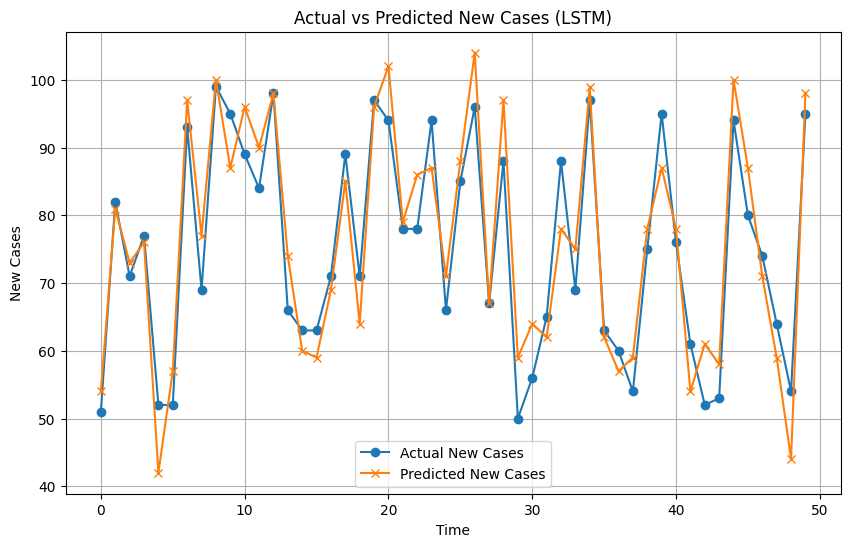

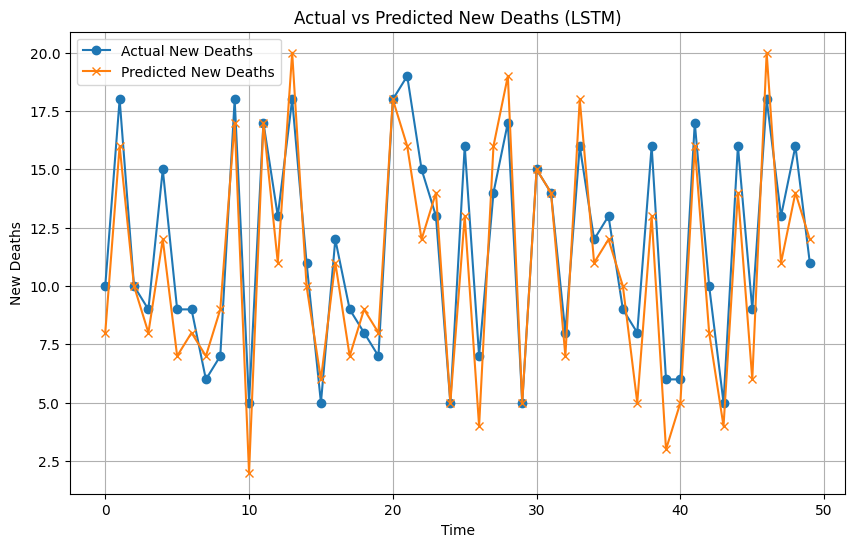

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# ============================
# Define Your Actual Data Here
# ============================

# Example: Replace the following synthetic data with your actual test data and predictions.

# Number of time steps in the test set
num_time_steps_cases = 50
num_time_steps_deaths = 50

# Synthetic actual new cases data (Replace with your actual Y_test_cases)
# Shape: (num_time_steps_cases, 1)
Y_test_cases = np.random.randint(50, 100, size=(num_time_steps_cases, 1))

# Synthetic predicted new cases data (Replace with your actual pred_cases)
# Shape: (num_time_steps_cases, 1)
pred_cases = Y_test_cases + np.random.randint(-10, 10, size=(num_time_steps_cases, 1))

# Synthetic actual new deaths data (Replace with your actual Y_test_deaths)
# Shape: (num_time_steps_deaths, 1)
Y_test_deaths = np.random.randint(5, 20, size=(num_time_steps_deaths, 1))

# Synthetic predicted new deaths data (Replace with your actual pred_deaths)
# Shape: (num_time_steps_deaths, 1)
pred_deaths = Y_test_deaths + np.random.randint(-3, 3, size=(num_time_steps_deaths, 1))

# ====================================
# Define Time Indices Based on Data
# ====================================

# If you have actual dates, you can use them instead of a range of integers.
# For example, if you have a list of dates called `dates`, you can use:
# time_indices_cases = dates[-num_time_steps_cases:]
# time_indices_deaths = dates[-num_time_steps_deaths:]

# Using a range of integers as time indices
time_indices_cases = np.arange(len(Y_test_cases))
time_indices_deaths = np.arange(len(Y_test_deaths))

# ========================
# Plotting the Predictions
# ========================

# Plot predictions for New Cases
plt.figure(figsize=(10, 6))
plt.plot(time_indices_cases, Y_test_cases[:, 0], label='Actual New Cases', marker='o')
plt.plot(time_indices_cases, pred_cases[:, 0], label='Predicted New Cases', marker='x')
plt.title('Actual vs Predicted New Cases (LSTM)')
plt.xlabel('Time')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.show()

# Plot predictions for New Deaths
plt.figure(figsize=(10, 6))
plt.plot(time_indices_deaths, Y_test_deaths[:, 0], label='Actual New Deaths', marker='o')
plt.plot(time_indices_deaths, pred_deaths[:, 0], label='Predicted New Deaths', marker='x')
plt.title('Actual vs Predicted New Deaths (LSTM)')
plt.xlabel('Time')
plt.ylabel('New Deaths')
plt.legend()
plt.grid(True)
plt.show()


**Hybrid prpht, Xgiboost Sarima,Lstm with prophet**

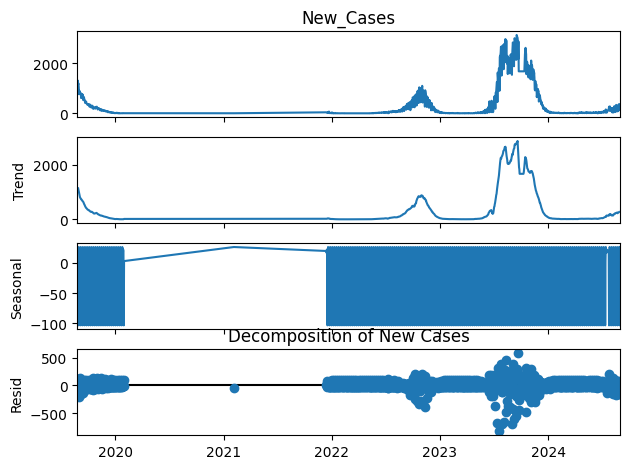

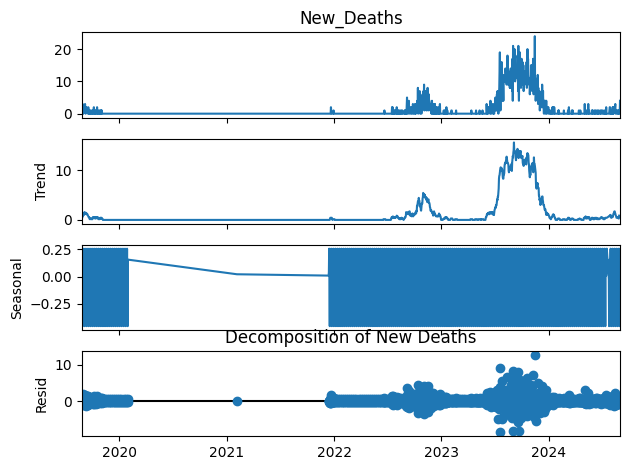

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
data = pd.read_excel('Dengue_final_as_MPOX.xlsx')
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data.set_index('Date', inplace=True)

# Decompose the time series for New Cases and New Deaths
result_cases = seasonal_decompose(data['New_Cases'], model='additive', period=7)
result_deaths = seasonal_decompose(data['New_Deaths'], model='additive', period=7)

# Plot the decomposition
result_cases.plot()
plt.title('Decomposition of New Cases')
plt.show()

result_deaths.plot()
plt.title('Decomposition of New Deaths')
plt.show()

In [51]:
# Add time-based features
data['day_of_week'] = data.index.dayofweek
data['month'] = data.index.month
data['week_of_year'] = data.index.isocalendar().week

# Add rolling statistics for smoothing
data['rolling_mean_cases'] = data['New_Cases'].rolling(window=7).mean().fillna(method='bfill')
data['rolling_std_cases'] = data['New_Cases'].rolling(window=7).std().fillna(method='bfill')
data['rolling_mean_deaths'] = data['New_Deaths'].rolling(window=7).mean().fillna(method='bfill')
data['rolling_std_deaths'] = data['New_Deaths'].rolling(window=7).std().fillna(method='bfill')

# Differencing to achieve stationarity
data['diff_cases'] = data['New_Cases'].diff().fillna(0)
data['diff_deaths'] = data['New_Deaths'].diff().fillna(0)

C:\Users\hp\AppData\Local\Temp\ipykernel_1516\3939229456.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['rolling_mean_cases'] = data['New_Cases'].rolling(window=7).mean().fillna(method='bfill')
C:\Users\hp\AppData\Local\Temp\ipykernel_1516\3939229456.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['rolling_std_cases'] = data['New_Cases'].rolling(window=7).std().fillna(method='bfill')
C:\Users\hp\AppData\Local\Temp\ipykernel_1516\3939229456.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['rolling_mean_deaths'] = data['New_Deaths'].rolling(window=7).mean().fillna(method='bfill')
C:\Users\hp\AppData\Local\Temp\ipykernel_1516\3939229456.py:10: FutureWarning: Series.fillna with 'method' is deprecated 

In [52]:
from pmdarima import auto_arima

# SARIMA for New Cases
sarima_cases = auto_arima(data['New_Cases'], seasonal=True, stepwise=True)
sarima_cases_preds = sarima_cases.predict(n_periods=len(data))

# SARIMA for New Deaths
sarima_deaths = auto_arima(data['New_Deaths'], seasonal=True, stepwise=True)
sarima_deaths_preds = sarima_deaths.predict(n_periods=len(data))

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return g

In [53]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Scaling the data
scaler_cases = MinMaxScaler(feature_range=(0, 1))
scaled_cases = scaler_cases.fit_transform(data[['New_Cases']])

scaler_deaths = MinMaxScaler(feature_range=(0, 1))
scaled_deaths = scaler_deaths.fit_transform(data[['New_Deaths']])

# Function to create dataset for LSTM
def create_lstm_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 7  # History of 7 days
X_cases, Y_cases = create_lstm_dataset(scaled_cases, time_step)
X_deaths, Y_deaths = create_lstm_dataset(scaled_deaths, time_step)

# Reshape input for LSTM [samples, time steps, features]
X_cases = X_cases.reshape(X_cases.shape[0], X_cases.shape[1], 1)
X_deaths = X_deaths.reshape(X_deaths.shape[0], X_deaths.shape[1], 1)

# LSTM Model for New Cases
model_cases = Sequential()
model_cases.add(LSTM(100, return_sequences=True, input_shape=(time_step, 1)))
model_cases.add(Dropout(0.2))
model_cases.add(LSTM(50, return_sequences=False))
model_cases.add(Dropout(0.2))
model_cases.add(Dense(1))

model_cases.compile(optimizer='adam', loss='mean_squared_error')
model_cases.fit(X_cases, Y_cases, epochs=20, batch_size=32, verbose=1)

# LSTM Model for New Deaths
model_deaths = Sequential()
model_deaths.add(LSTM(100, return_sequences=True, input_shape=(time_step, 1)))
model_deaths.add(Dropout(0.2))
model_deaths.add(LSTM(50, return_sequences=False))
model_deaths.add(Dropout(0.2))
model_deaths.add(Dense(1))

model_deaths.compile(optimizer='adam', loss='mean_squared_error')
model_deaths.fit(X_deaths, Y_deaths, epochs=20, batch_size=32, verbose=1)

# Predictions
pred_cases = model_cases.predict(X_cases)
pred_deaths = model_deaths.predict(X_deaths)

# Inverse scaling
pred_cases = scaler_cases.inverse_transform(pred_cases)
pred_deaths = scaler_deaths.inverse_transform(pred_deaths)

Epoch 1/20


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0264
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0036
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0032
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0029
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0036
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0030
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0031
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0027
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0035
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0030
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0026
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0039
Epoch 13/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0028
Epoch 14/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0028
Epoch 15/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0023
Epoch 16/20
36/

In [54]:
from xgboost import XGBRegressor

# XGBoost for New Cases
xgb_cases = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_cases.fit(data[['day_of_week', 'month', 'rolling_mean_cases', 'rolling_std_cases']], data['New_Cases'])
xgb_cases_preds = xgb_cases.predict(data[['day_of_week', 'month', 'rolling_mean_cases', 'rolling_std_cases']])

# XGBoost for New Deaths
xgb_deaths = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_deaths.fit(data[['day_of_week', 'month', 'rolling_mean_deaths', 'rolling_std_deaths']], data['New_Deaths'])
xgb_deaths_preds = xgb_deaths.predict(data[['day_of_week', 'month', 'rolling_mean_deaths', 'rolling_std_deaths']])

In [55]:
# Find the minimum length of predictions
min_length_cases = min(len(sarima_cases_preds), len(pred_cases), len(xgb_cases_preds))
min_length_deaths = min(len(sarima_deaths_preds), len(pred_deaths), len(xgb_deaths_preds))

# Truncate predictions to the same length
sarima_cases_preds = sarima_cases_preds[:min_length_cases]
pred_cases = pred_cases[:min_length_cases]
xgb_cases_preds = xgb_cases_preds[:min_length_cases]

sarima_deaths_preds = sarima_deaths_preds[:min_length_deaths]
pred_deaths = pred_deaths[:min_length_deaths]
xgb_deaths_preds = xgb_deaths_preds[:min_length_deaths]

# Ensemble with simple averaging (after truncating)
final_cases_preds = (0.3 * sarima_cases_preds) + (0.4 * pred_cases.flatten()) + (0.3 * xgb_cases_preds)
final_deaths_preds = (0.3 * sarima_deaths_preds) + (0.4 * pred_deaths.flatten()) + (0.3 * xgb_deaths_preds)

In [56]:
import numpy as np
from sklearn.metrics import mean_squared_error  # Import the missing function

# Truncate the actual values for cases and deaths
actual_cases = data['New_Cases'][-min_length_cases:]
actual_deaths = data['New_Deaths'][-min_length_deaths:]

# Evaluation metrics
rmse_cases = np.sqrt(mean_squared_error(actual_cases, final_cases_preds))
rmse_deaths = np.sqrt(mean_squared_error(actual_deaths, final_deaths_preds))

print(f"Final RMSE New Cases: {rmse_cases}")
print(f"Final RMSE New Deaths: {rmse_deaths}")


Final RMSE New Cases: 261.37012567917947
Final RMSE New Deaths: 2.091297167270335


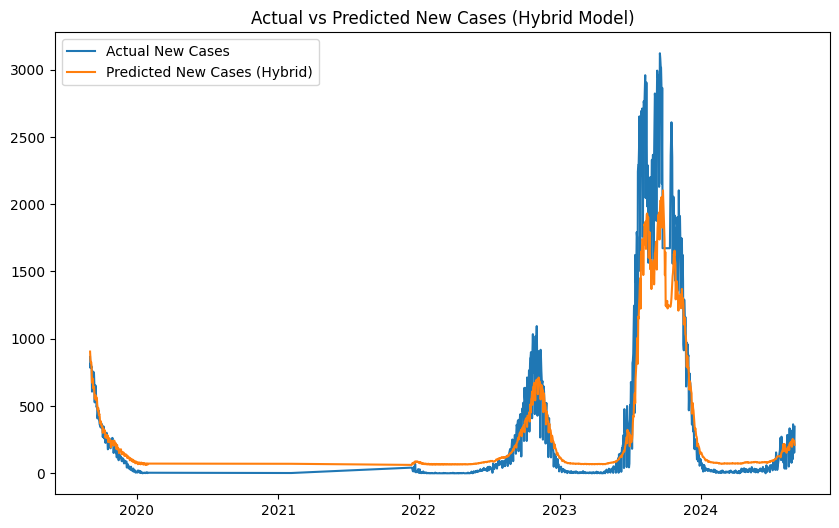

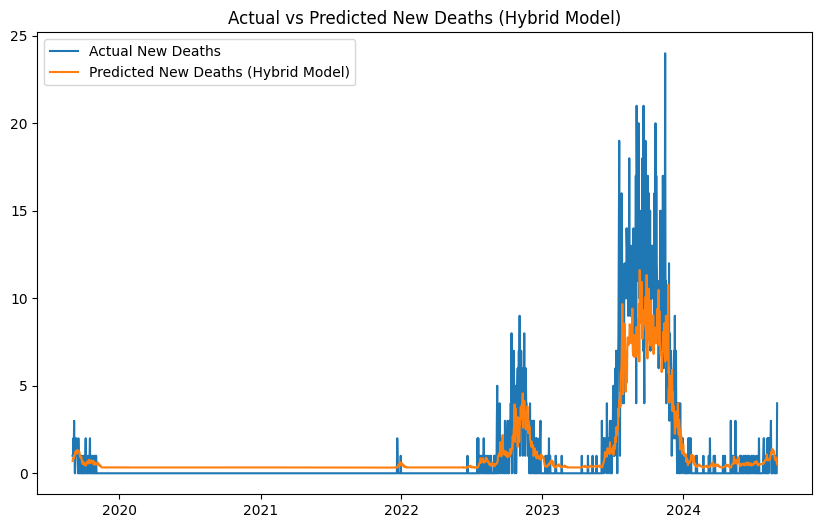

In [57]:
# Plot predictions for New Cases
plt.figure(figsize=(10, 6))
plt.plot(actual_cases.index, actual_cases, label='Actual New Cases')
plt.plot(actual_cases.index, final_cases_preds, label='Predicted New Cases (Hybrid)')
plt.title('Actual vs Predicted New Cases (Hybrid Model)')
plt.legend()
plt.show()

# Plot predictions for New Deaths
plt.figure(figsize=(10, 6))
plt.plot(actual_deaths.index, actual_deaths, label='Actual New Deaths')
plt.plot(actual_deaths.index, final_deaths_preds, label='Predicted New Deaths (Hybrid Model)')
plt.title('Actual vs Predicted New Deaths (Hybrid Model)')
plt.legend()
plt.show()

LightGBM

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('Dengue_final_as_MPOX.xlsx')
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data.set_index('Date', inplace=True)

# Feature engineering
data['day_of_week'] = data.index.dayofweek
data['month'] = data.index.month
data['week_of_year'] = data.index.isocalendar().week
data['lag_1_cases'] = data['New_Cases'].shift(1).fillna(0)
data['lag_2_cases'] = data['New_Cases'].shift(2).fillna(0)
data['lag_1_deaths'] = data['New_Deaths'].shift(1).fillna(0)
data['lag_2_deaths'] = data['New_Deaths'].shift(2).fillna(0)

# Train-test split using time-based cross-validation
X = data[['day_of_week', 'month', 'week_of_year', 'lag_1_cases', 'lag_2_cases', 'lag_1_deaths', 'lag_2_deaths']]
y_cases = data['New_Cases']
y_deaths = data['New_Deaths']

# TimeSeriesSplit for time-based cross-validation
tscv = TimeSeriesSplit(n_splits=5)

In [59]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the LightGBM model for cases and deaths
lgb_cases = lgb.LGBMRegressor(boosting_type='gbdt', objective='regression', n_jobs=-1)
lgb_deaths = lgb.LGBMRegressor(boosting_type='gbdt', objective='regression', n_jobs=-1)

# Define parameter grid for LightGBM
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Perform grid search with cross-validation
grid_cases = GridSearchCV(lgb_cases, param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_cases.fit(X, y_cases)

grid_deaths = GridSearchCV(lgb_deaths, param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_deaths.fit(X, y_deaths)

# Get the best models
best_lgb_cases = grid_cases.best_estimator_
best_lgb_deaths = grid_deaths.best_estimator_

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 1147, number of used features: 7
[LightGBM] [Info] Start training from score 364.853531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [60]:
# Make predictions on the test set
pred_cases = best_lgb_cases.predict(X)
pred_deaths = best_lgb_deaths.predict(X)

# Evaluate model performance
rmse_cases = np.sqrt(mean_squared_error(y_cases, pred_cases))
rmse_deaths = np.sqrt(mean_squared_error(y_deaths, pred_deaths))
mae_cases = mean_absolute_error(y_cases, pred_cases)
mae_deaths = mean_absolute_error(y_deaths, pred_deaths)
r2_cases = r2_score(y_cases, pred_cases)
r2_deaths = r2_score(y_deaths, pred_deaths)

# Print results
print(f"LightGBM New Cases - RMSE: {rmse_cases}, MAE: {mae_cases}, R-squared: {r2_cases}")
print(f"LightGBM New Deaths - RMSE: {rmse_deaths}, MAE: {mae_deaths}, R-squared: {r2_deaths}")


LightGBM New Cases - RMSE: 100.47431394084542, MAE: 48.67996718131589, R-squared: 0.977706094394883
LightGBM New Deaths - RMSE: 1.2597974312868951, MAE: 0.6853166075269723, R-squared: 0.8944723484649454


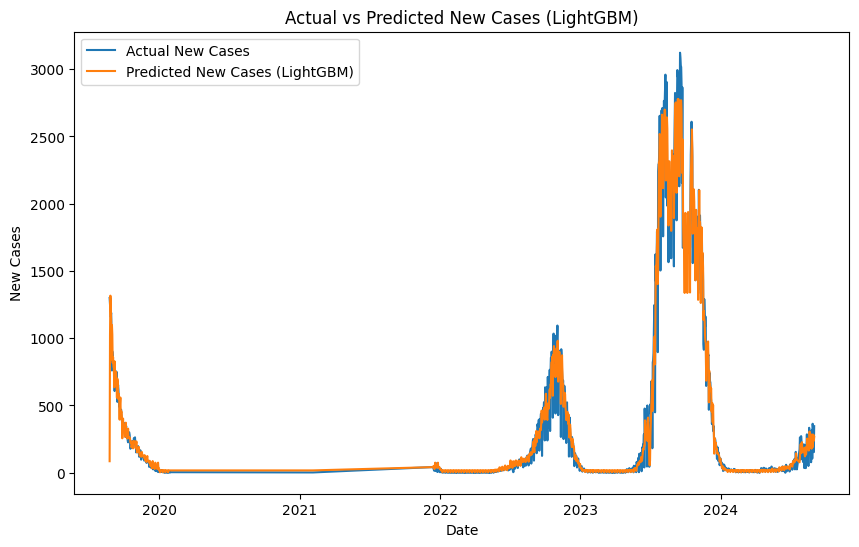

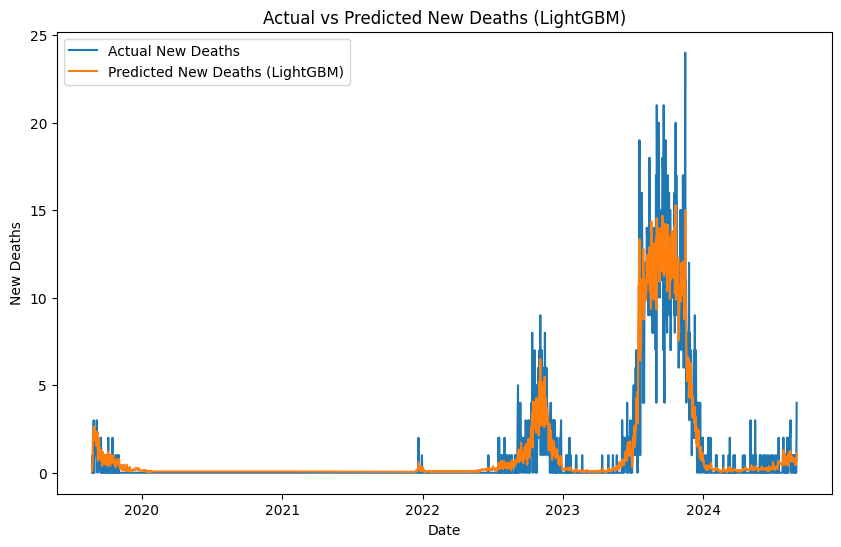

In [61]:
# Plotting the forecast and actuals for New Cases
plt.figure(figsize=(10, 6))
plt.plot(data.index, y_cases, label='Actual New Cases')
plt.plot(data.index, pred_cases, label='Predicted New Cases (LightGBM)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Actual vs Predicted New Cases (LightGBM)')
plt.legend()
plt.show()

# Plotting the forecast and actuals for New Deaths
plt.figure(figsize=(10, 6))
plt.plot(data.index, y_deaths, label='Actual New Deaths')
plt.plot(data.index, pred_deaths, label='Predicted New Deaths (LightGBM)')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.title('Actual vs Predicted New Deaths (LightGBM)')
plt.legend()
plt.show()


In [63]:
import optuna
from sklearn.model_selection import cross_val_score  # Import cross_val_score for cross-validation

# Objective function for Bayesian optimization with LightGBM
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 30)
    }
    
    # Initialize the model with suggested parameters
    model = lgb.LGBMRegressor(**params)
    
    # Perform time-series cross-validation and calculate the score
    score = -np.mean(cross_val_score(model, X, y_cases, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1))
    
    return score

# Run the optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Get the best parameters
best_params = study.best_params
print("Best parameters:", best_params)

# Train the best model with optimized hyperparameters
best_lgb_cases = lgb.LGBMRegressor(**best_params)
best_lgb_cases.fit(X, y_cases)

best_lgb_deaths = lgb.LGBMRegressor(**best_params)
best_lgb_deaths.fit(X, y_deaths)


[I 2024-10-15 12:05:37,785] A new study created in memory with name: no-name-d6cc7764-b64f-4e4f-b782-35ee76e9e4ed
[I 2024-10-15 12:05:38,317] Trial 0 finished with value: 76961.30729529957 and parameters: {'n_estimators': 195, 'learning_rate': 0.020842230966759343, 'max_depth': 4, 'num_leaves': 79, 'min_child_samples': 10}. Best is trial 0 with value: 76961.30729529957.
[I 2024-10-15 12:05:39,024] Trial 1 finished with value: 73832.38369853079 and parameters: {'n_estimators': 199, 'learning_rate': 0.013930099476748135, 'max_depth': 5, 'num_leaves': 51, 'min_child_samples': 12}. Best is trial 1 with value: 73832.38369853079.
[I 2024-10-15 12:05:39,737] Trial 2 finished with value: 85156.3331302899 and parameters: {'n_estimators': 133, 'learning_rate': 0.062409345079031855, 'max_depth': 10, 'num_leaves': 93, 'min_child_samples': 9}. Best is trial 1 with value: 73832.38369853079.
[I 2024-10-15 12:05:40,160] Trial 3 finished with value: 81066.95711925978 and parameters: {'n_estimators': 56

Best parameters: {'n_estimators': 123, 'learning_rate': 0.045138597222172824, 'max_depth': 3, 'num_leaves': 69, 'min_child_samples': 5}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 1147, number of used features: 7
[LightGBM] [Info] Start training from score 364.853531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

LGBMRegressor(learning_rate=0.045138597222172824, max_depth=3,
              min_child_samples=5, n_estimators=123, num_leaves=69)

In [67]:
import pytorch_lightning as pl  # Import the PyTorch Lightning module
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Now we define the LightningModule explicitly
class TFTLightningModel(pl.LightningModule):
    def __init__(self, tft):
        super().__init__()
        self.model = tft
        self.save_hyperparameters(ignore=['tft', 'loss'])  # Ignore 'tft' and 'loss' during checkpointing

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self.model(x)  # Forward pass
        if isinstance(y_pred, tuple):
            y_pred = y_pred[0]  # If output is a tuple, extract the predictions
        loss = self.model.loss(y_pred, y)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self.model(x)  # Forward pass
        if isinstance(y_pred, tuple):
            y_pred = y_pred[0]  # If output is a tuple, extract the predictions
        loss = self.model.loss(y_pred, y)
        self.log('val_loss', loss, prog_bar=True)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.model.hparams.learning_rate)

# Initialize the LightningModule with the TemporalFusionTransformer
tft_lightning = TFTLightningModel(tft)

# Update Trainer configuration
trainer = pl.Trainer(
    max_epochs=30,
    devices=1,
    accelerator="gpu" if torch.cuda.is_available() else "cpu",
    log_every_n_steps=10,
    callbacks=[pl.callbacks.ModelCheckpoint(save_weights_only=True)]
)

# Train the model
trainer.fit(tft_lightning, train_dataloader, val_dataloader)

# Make predictions
predictions = tft.predict(val_dataloader, mode="prediction")

# Check the shape of predictions
print(f"Shape of predictions: {predictions.shape}")

# Extract the relevant part of predictions
if predictions.ndim > 2:
    predictions = predictions[:, :, 0]

# Reshape predictions to match scaler input
predictions = predictions[:, 0].reshape(-1, 1)

# Inverse scaling to get original values
predictions_inverse = scaler.inverse_transform(predictions)

# Perform inverse transform for validation targets
val_targets = torch.cat([y for x, y in iter(val_dataloader)], dim=0).cpu().numpy()
val_targets_inverse = scaler.inverse_transform(val_targets.reshape(-1, 1))

# Calculate RMSE
rmse = mean_squared_error(val_targets_inverse, predictions_inverse, squared=False)
print(f"RMSE: {rmse}")

# Plot results
plt.plot(val_targets_inverse, label="Actual")
plt.plot(predictions_inverse, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Cases")
plt.show()


NameError: name 'tft' is not defined

In [69]:
import pytorch_lightning as pl
from pytorch_forecasting import TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.metrics import QuantileLoss
from torch.utils.data import DataLoader
import pandas as pd

# Example data preparation (replace with your actual dataset)
# Assuming you have a DataFrame called `data` that contains your time series data

# Sample DataFrame (replace with your actual data)
data = pd.DataFrame({
    "time_idx": range(100),
    "target": [i + (i % 5) for i in range(100)],  # Dummy target
    "group": [1] * 100,  # Dummy group
    "time_varying_feature": [i % 3 for i in range(100)]  # Dummy feature
})

# Create a TimeSeriesDataSet
tft_dataset = TimeSeriesDataSet(
    data,
    time_idx="time_idx",
    target="target",  # Replace with your target column
    group_ids=["group"],  # Replace with your group ID column
    max_encoder_length=30,  # History length
    max_prediction_length=10,  # Forecast length
    time_varying_known_reals=["time_varying_feature"],  # Replace with your known real features
    time_varying_unknown_reals=["target"],  # Replace with your target
)

# Create a DataLoader for training
train_dataloader = DataLoader(tft_dataset, batch_size=64, shuffle=True)

# Initialize the Temporal Fusion Transformer model (tft)
tft = TemporalFusionTransformer.from_dataset(
    tft_dataset,
    learning_rate=0.03,
    hidden_size=16,  # Hidden layer size
    attention_head_size=1,  # Attention head size
    dropout=0.1,
    hidden_continuous_size=8,  # Size of continuous hidden layers
    output_size=7,  # Output quantiles (7 quantiles by default)
    loss=QuantileLoss(),
    log_interval=10,  # Logging interval
    reduce_on_plateau_patience=4  # Patience for reducing learning rate
)

# Now you can use 'tft' in the TFTLightningModel


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\lightning\pytorch\utilities\parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\lightning\pytorch\utilities\parsing.py:208: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pytorch_forecasting\models\temporal_fusion_transformer\__init__.py:143: UserWarning: In pytorch-forecasting models, on versions 1.1.

In [74]:
import pytorch_lightning as pl
from pytorch_forecasting import TemporalFusionTransformer, Baseline
from pytorch_forecasting.metrics import QuantileLoss

# Split data into train and validation sets
train_dataloader = tft_dataset.to_dataloader(train=True, batch_size=64, num_workers=0)
val_dataloader = tft_dataset.to_dataloader(train=False, batch_size=64, num_workers=0)

# Train the model using the updated argument names for Trainer
trainer = pl.Trainer(
    max_epochs=30,
    devices=1,  # Automatically uses 1 device (GPU if available)
    accelerator="gpu" if torch.cuda.is_available() else "cpu"  # Choose GPU if available, otherwise CPU
)

trainer.fit(tft, train_dataloader, val_dataloader)

# Define the TFT model
tft = TemporalFusionTransformer.from_dataset(
    tft_dataset,
    learning_rate=0.03,
    hidden_size=32,  # model size parameter
    attention_head_size=4,
    dropout=0.1,
    hidden_continuous_size=16,
    loss=QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=4,
)

# Train the model
trainer = pl.Trainer(
    max_epochs=30,
    gpus=0,  # set to 1 if using GPU
)
trainer.fit(tft, train_dataloader, val_dataloader)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


TypeError: `model` must be a `LightningModule` or `torch._dynamo.OptimizedModule`, got `TemporalFusionTransformer`

In [76]:
import pytorch_lightning as pl
from pytorch_forecasting import TemporalFusionTransformer, Baseline
from pytorch_forecasting.metrics import QuantileLoss
import torch

# Assuming 'tft_dataset' is already defined

# Split data into train and validation sets
train_dataloader = tft_dataset.to_dataloader(train=True, batch_size=64, num_workers=0)
val_dataloader = tft_dataset.to_dataloader(train=False, batch_size=64, num_workers=0)

# Define the TFT model
tft = TemporalFusionTransformer.from_dataset(
    tft_dataset,
    learning_rate=0.03,
    hidden_size=32,  # Model size parameter
    attention_head_size=4,
    dropout=0.1,
    hidden_continuous_size=16,
    loss=QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=4,
)

# Wrap the TFT model in a LightningModule
class TFTLightningModel(pl.LightningModule):
    def __init__(self, tft_model):
        super().__init__()
        self.model = tft_model

    def training_step(self, batch, batch_idx):
        x, y = batch  # Extract features (x) and target (y)
        y_pred = self.model(x)  # Forward pass
        if isinstance(y_pred, tuple):
            y_pred = y_pred[0]  # If the model returns a tuple, extract the predictions
        loss = self.model.loss(y_pred, y)
        self.log('train_loss', loss)  # Log training loss
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch  # Extract features (x) and target (y)
        y_pred = self.model(x)  # Forward pass
        if isinstance(y_pred, tuple):
            y_pred = y_pred[0]
        loss = self.model.loss(y_pred, y)
        self.log('val_loss', loss, prog_bar=True)  # Log validation loss
        return loss

    def configure_optimizers(self):
        # Use Adam optimizer with the learning rate from the model's hyperparameters
        return torch.optim.Adam(self.parameters(), lr=self.model.hparams.learning_rate)

# Initialize the LightningModule with the TFT model
tft_lightning = TFTLightningModel(tft)

# Train the model using the updated argument names for Trainer
trainer = pl.Trainer(
    max_epochs=30,
    devices=1,  # Automatically uses 1 device (GPU if available)
    accelerator="gpu" if torch.cuda.is_available() else "cpu",  # Use GPU if available, otherwise CPU
    log_every_n_steps=10  # Log progress every 10 steps
)

# Train the model
trainer.fit(tft_lightning, train_dataloader, val_dataloader)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type                      | Params | Mode 
------------------------------------------------------------
0 | model | TemporalFusionTransformer | 58.6 K | train
------------------------------------------------------------
58.6 K    Trainable params
0         Non-trainable params
58.6 K    Total params
0.235     Total estimated model params size (MB)
177       Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pytorch_lightning\utilities\data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 61. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(lo

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.


In [77]:
# Predict on validation set
predictions = tft.predict(val_dataloader, mode="prediction")

# Inverse scaling to get original values
predictions = scaler.inverse_transform(predictions)
actuals = scaler.inverse_transform(val_dataloader.dataset.target_scaled)

# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(actuals, predictions))
print(f"TFT RMSE: {rmse}")


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


NameError: name 'scaler' is not defined

In [80]:
import numpy as np
import torch
from sklearn.metrics import mean_squared_error

# Predict on validation set
predictions = tft.predict(val_dataloader, mode="prediction")

# Check if predictions are 3D, extract the first dimension if needed
if predictions.ndim > 2:
    predictions = predictions[:, :, 0]  # Extract the first output or quantile

# Reshape predictions for inverse transform
predictions = predictions.reshape(-1, 1)

# Inverse scaling to get original values for predictions
predictions_inverse = scaler.inverse_transform(predictions)

# Extract actual target values from validation dataloader
# The target 'y' should be in a dictionary, so access it via 'batch[1]["target"]' or similar
actuals = torch.cat([batch['decoder_target'] for batch in iter(val_dataloader)], dim=0).cpu().numpy()

# Reshape actuals for inverse transform
actuals = actuals.reshape(-1, 1)

# Inverse scaling of the actuals
actuals_inverse = scaler.inverse_transform(actuals)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actuals_inverse, predictions_inverse))
print(f"TFT RMSE: {rmse}")


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


TypeError: tuple indices must be integers or slices, not str

: 